<h1> <center> 7 - Co-voting networks </center> </h1>

**Author:** Sebastião Rosalino, nº 20230372

**Supervisors:** Flávio Pinheiro, António Curado

<div style="text-align: center;">
    <img src="../logos/nova_ims_logo.png" alt="Image 1" style="width: 15%; display: inline-block; margin: 0 10px;"/>
    <img src="../logos/european_parliament_logo.png" alt="Image 2" style="width: 15%; display: inline-block; margin: 0 10px;"/>
</div>

# Table of Contents

1. [Data Preparation](#Data-Preparation)
2. [All bills](#All-bills)
3. [Years](#Years)
   - 3.1. [2019](#2019)
   - 3.2. [2020](#2020)
   - 3.3. [2021](#2021)
   - 3.4. [2022](#2022)
   - 3.5. [2023](#2023)
   - 3.6. [2024](#2024)
4. [Primary subjects](#Primary-subjects)
   - 4.1. [European citizenship](#European-citizenship)
   - 4.2. [Internal market, single market](#Internal-market-single-market)
   - 4.3. [Community policies](#Community-policies)
   - 4.4. [Economic, social and territorial cohesion](#Economic-social-and-territorial-cohesion)
   - 4.5. [Economic and monetary system](#Economic-and-monetary-system)
   - 4.6. [External relations of the Union](#External-relations-of-the-Union)
   - 4.7. [Area of freedom, security and justice](#Area-of-freedom-security-and-justice)
   - 4.8. [State and evolution of the Union](#State-and-evolution-of-the-Union)

In [1]:
# Import the necessary libraries and configurations
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import community as community_louvain
import seaborn as sns

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
# Read all the datasets from their corresponding folders
members = pd.read_csv("../datasets/second_stage/2_members/members.csv")
group_memberships_single = pd.read_csv("../datasets/second_stage/3_group_memberships/group_memberships_single.csv")
bills = pd.read_csv("../datasets/second_stage/4_bills/bills.csv")
member_votes = pd.read_csv("../datasets/second_stage/5_member_votes/member_votes.csv")
primary_subject_bills = pd.read_csv("../datasets/second_stage/6_bill_subject_assignment/primary_subject_bills.csv")
secondary_subject_bills = pd.read_csv("../datasets/second_stage/6_bill_subject_assignment/secondary_subject_bills.csv")
tertiary_subject_bills = pd.read_csv("../datasets/second_stage/6_bill_subject_assignment/tertiary_subject_bills.csv")

In [3]:
# A reminder of how the members dataset looks like
members

,country_code,id_mep,name,full_term
0,LUX,0,Charles GOERENS,1
1,GBR,1,Bill NEWTON DUNN,0
2,DEU,2,Constanze KREHL,0
3,PRT,3,Carlos COELHO,0
4,DEU,4,Bernd LANGE,1
...,...,...,...,...
866,PRT,868,Vasco BECKER-WEINBERG,0
867,PRT,869,Ana Miguel DOS SANTOS,0
868,PRT,870,Vânia NETO,0
869,PRT,871,Teófilo SANTOS,0


In [4]:
# A reminder of how the group_memberships_single looks like
group_memberships_single

,group_code,start_date,end_date,id_mep,membership_length
0,RENEW,2019-07-02,2024-07-15,0,1840
1,RENEW,2019-07-02,2020-01-31,1,213
2,SD,2019-07-02,2022-10-02,2,1188
3,EPP,2023-07-07,2024-07-15,3,374
4,SD,2019-07-02,2024-07-15,4,1840
...,...,...,...,...,...
866,EPP,2024-03-26,2024-07-15,868,111
867,EPP,2024-04-02,2024-07-15,869,104
868,EPP,2024-04-02,2024-07-15,870,104
869,EPP,2024-04-02,2024-07-15,871,104


In [5]:
# A reminder of how the bills dataset looks like
bills

,timestamp,procedure_reference,id_bill,text
0,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreemen...
1,2021-12-14 14:49:19,2010/0112(NLE),786,recommendation draft council decision conclusi...
2,2020-06-17 23:24:52,2010/0180(NLE),201,eujordan agreement euro-mediterranean aviation...
3,2020-06-17 23:24:52,2010/0186(NLE),203,eugeorgia agreement common aviation area
4,2020-06-17 23:24:52,2012/0006(NLE),198,eumoldova common aviation area agreement
...,...,...,...,...
1898,2024-04-25 12:51:39,2024/2696(RSP),1902,joint motion resolution new allegation russian...
1899,2024-04-25 12:20:42,2024/2698(RSP),1898,european parliament resolution azerbaijan nota...
1900,2024-04-25 12:21:01,2024/2699(RSP),1901,european parliament resolution propose repeal ...
1901,2024-04-25 12:53:44,2024/2703(RSP),1900,joint motion resolution


In [6]:
# A reminder of how the member_votes dataset looks like
member_votes

,position,country_code,group_code,id_mep,id_bill
0,FOR,LUX,RENEW,0,0
1,FOR,GBR,RENEW,1,0
2,DID_NOT_VOTE,DEU,SD,2,0
3,FOR,DEU,SD,4,0
4,FOR,DEU,SD,5,0
...,...,...,...,...,...
1345669,DID_NOT_VOTE,PRT,EPP,868,1902
1345670,DID_NOT_VOTE,PRT,EPP,869,1902
1345671,DID_NOT_VOTE,PRT,EPP,870,1902
1345672,FOR,PRT,EPP,871,1902


## 1. Data Preparation
<a id="Data-Preparation"></a>

In [7]:
# Count the total number of bills
total_bills = bills.shape[0]

# Count the number of actual votes (excluding "DID_NOT_VOTE") for each MEP
valid_votes = member_votes[member_votes["position"] != "DID_NOT_VOTE"].groupby("id_mep").size()

# Identify MEPs who have voted in at least 50% of all bills
meps_to_be_kept = list(valid_votes[valid_votes >= 0.5 * total_bills].index)

# Visualize the MEPs to be kept
meps_to_be_kept

[0,
 2,
 4,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 20,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 46,
 47,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 85,
 86,
 88,
 90,
 91,
 92,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 108,
 109,
 110,
 111,
 114,
 115,
 116,
 117,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 151,
 153,
 154,
 155,
 156,
 157,
 159,
 160,
 162,
 163,
 164,
 165,
 166,
 168,
 170,
 171,
 172,
 173,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 191,
 192,
 193,
 194,
 195,
 197,
 199,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,

In [8]:
# Replace values in the 'position' column as follows:
# FOR for "supporting"
# AGAINST, ABSTENTION and DID_NOT_VOTE for "not_supporting" 
member_votes['position'] = member_votes['position'].replace({
    'FOR': 'supporting',
    'AGAINST': 'not_supporting',
    'ABSTENTION': 'not_supporting',
    'DID_NOT_VOTE': 'not_supporting'
})

# Visualize the resulting member_votes dataset
member_votes

,position,country_code,group_code,id_mep,id_bill
0,supporting,LUX,RENEW,0,0
1,supporting,GBR,RENEW,1,0
2,not_supporting,DEU,SD,2,0
3,supporting,DEU,SD,4,0
4,supporting,DEU,SD,5,0
...,...,...,...,...,...
1345669,not_supporting,PRT,EPP,868,1902
1345670,not_supporting,PRT,EPP,869,1902
1345671,not_supporting,PRT,EPP,870,1902
1345672,supporting,PRT,EPP,871,1902


In [9]:
# Compute the absolute count of "supporting" and "not_supporting" votes for each bill
vote_counts = member_votes.groupby(['id_bill', 'position']).size().unstack(fill_value=0)

# Compute total votes per bill
vote_counts['total_votes'] = vote_counts.sum(axis=1)

# Compute the percentages of "supporting" and "not_supporting" for each bill
vote_percentages = vote_counts.div(vote_counts['total_votes'], axis=0)

# Get the minority percentage (smallest between "supporting" and "not_supporting")
vote_percentages['minority_percentage'] = vote_percentages[['supporting', 'not_supporting']].min(axis=1)

# Merge with the bills dataset, in a new column called "minority_percentage"
bills = bills.merge(vote_percentages[['minority_percentage']], left_on='id_bill', right_index=True, how='left')

# Visualize the resulting bills dataset
bills

,timestamp,procedure_reference,id_bill,text,minority_percentage
0,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreemen...,0.115057
1,2021-12-14 14:49:19,2010/0112(NLE),786,recommendation draft council decision conclusi...,0.066667
2,2020-06-17 23:24:52,2010/0180(NLE),201,eujordan agreement euro-mediterranean aviation...,0.072443
3,2020-06-17 23:24:52,2010/0186(NLE),203,eugeorgia agreement common aviation area,0.072443
4,2020-06-17 23:24:52,2012/0006(NLE),198,eumoldova common aviation area agreement,0.071023
...,...,...,...,...,...
1898,2024-04-25 12:51:39,2024/2696(RSP),1902,joint motion resolution new allegation russian...,0.391489
1899,2024-04-25 12:20:42,2024/2698(RSP),1898,european parliament resolution azerbaijan nota...,0.327660
1900,2024-04-25 12:21:01,2024/2699(RSP),1901,european parliament resolution propose repeal ...,0.241135
1901,2024-04-25 12:53:44,2024/2703(RSP),1900,joint motion resolution,0.397163


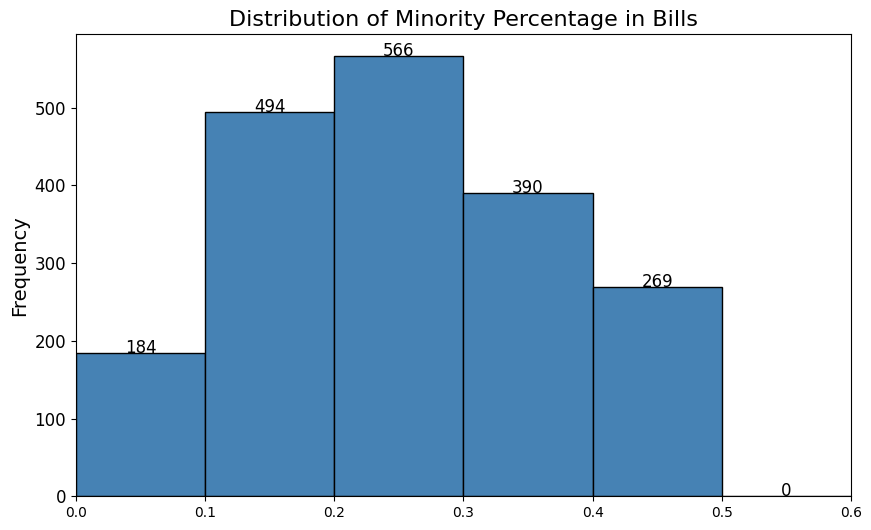

In [10]:
# Create the figure
plt.figure(figsize=(10, 6))

# Plot the histogram
counts, bins, patches = plt.hist(bills['minority_percentage'], bins=np.arange(0, 1.1, 0.1), 
                                 color='steelblue', edgecolor='black')

# Set y-label and title
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Minority Percentage in Bills", fontsize=16)

# Set ticks for every 0.1 bin
plt.xticks(np.arange(0, 0.7, 0.1))  
plt.yticks(fontsize=12)

# Limit x-axis to go only until 0.6
plt.xlim(0, 0.6)

# Add frequency labels on top of each bin
for count, bin_edge in zip(counts, bins[:-1]):
    if bin_edge <= 0.6:  # Only annotate bins within the x-axis limit
        plt.text(bin_edge + 0.05, count + 0.7, str(int(count)), ha='center', fontsize=12, color='black')

# Display the plot
plt.show()

In [11]:
# Store in a list all id_bill's with minority_percentage >= 0.025
bills_to_be_kept = bills.loc[bills["minority_percentage"] >= 0.025, "id_bill"].tolist()

# Visualize the list of bills to be kept
bills_to_be_kept

[200,
 786,
 201,
 203,
 198,
 789,
 204,
 1375,
 1616,
 199,
 1362,
 1363,
 1224,
 757,
 1765,
 687,
 1773,
 1836,
 1843,
 1767,
 1844,
 454,
 371,
 825,
 225,
 224,
 226,
 481,
 258,
 873,
 92,
 740,
 896,
 897,
 1391,
 1395,
 475,
 457,
 464,
 253,
 91,
 652,
 653,
 202,
 365,
 560,
 441,
 641,
 309,
 310,
 311,
 478,
 476,
 646,
 607,
 688,
 694,
 647,
 654,
 479,
 568,
 110,
 106,
 107,
 108,
 109,
 123,
 72,
 73,
 42,
 70,
 90,
 1225,
 1087,
 366,
 28,
 29,
 597,
 603,
 598,
 69,
 68,
 252,
 122,
 695,
 76,
 189,
 190,
 50,
 71,
 255,
 121,
 120,
 570,
 49,
 55,
 56,
 480,
 477,
 74,
 1157,
 191,
 27,
 129,
 128,
 31,
 25,
 26,
 312,
 67,
 192,
 127,
 130,
 318,
 319,
 313,
 75,
 356,
 505,
 390,
 360,
 3,
 14,
 133,
 632,
 7,
 6,
 5,
 8,
 53,
 52,
 30,
 4,
 15,
 16,
 180,
 150,
 156,
 151,
 154,
 185,
 182,
 152,
 153,
 160,
 171,
 158,
 166,
 181,
 147,
 143,
 176,
 155,
 134,
 163,
 162,
 145,
 148,
 179,
 178,
 157,
 144,
 175,
 183,
 146,
 159,
 177,
 170,
 184,
 172,
 174,


In [12]:
# Get the list of MEPs whose most significant status has been as NI
ni_meps = group_memberships_single[group_memberships_single["group_code"] == "NI"]["id_mep"].tolist()

# Filter out voting records from the member_votes dataset belonging to MEPs whose most significant status has been as NI
member_votes = member_votes[~member_votes["id_mep"].isin(ni_meps)]

# Visualize the resulting member_votes dataset
member_votes

,position,country_code,group_code,id_mep,id_bill
0,supporting,LUX,RENEW,0,0
1,supporting,GBR,RENEW,1,0
2,not_supporting,DEU,SD,2,0
3,supporting,DEU,SD,4,0
4,supporting,DEU,SD,5,0
...,...,...,...,...,...
1345669,not_supporting,PRT,EPP,868,1902
1345670,not_supporting,PRT,EPP,869,1902
1345671,not_supporting,PRT,EPP,870,1902
1345672,supporting,PRT,EPP,871,1902


In [13]:
# Filter the member_votes dataset to keep only voting records belonging to MEPs who voted in at least 50% of all roll-call votes in non high-consensual bills and keep also
# only MEPs whose most significant status has been with a group and not as NI
member_votes = member_votes[
    (member_votes["id_bill"].isin(bills_to_be_kept)) & 
    (member_votes["id_mep"].isin(meps_to_be_kept))
]

# Visualize the resulting member_votes dataset
member_votes

,position,country_code,group_code,id_mep,id_bill
0,supporting,LUX,RENEW,0,0
2,not_supporting,DEU,SD,2,0
3,supporting,DEU,SD,4,0
5,supporting,DEU,EPP,6,0
6,supporting,DEU,EPP,7,0
...,...,...,...,...,...
1345613,supporting,DEU,EPP,811,1902
1345615,supporting,SWE,SD,813,1902
1345616,supporting,NLD,RENEW,815,1902
1345617,supporting,DEU,SD,816,1902


In [14]:
def create_agents_and_artifacts(member_votes):
    """
    Create a dataframe representing the agents and artifacts matrix where rows represent MEPs (agents) and columns represent bills (artifacts), except for the first column 
    which indicates the name of the MEP, and values are 1 if the MEP voted "supporting" on a bill, otherwise 0.

    Parameters:
    member_votes (DataFrame): A dataset containing voting records with columns
                              'position', 'id_mep', and 'id_bill'.
                              
    Returns:
    DataFrame: A dataframe with MEPs as rows, bills as columns, except for the first column that indicates the name of the MEP, and binary values for voting positions.
    """
    # Filter votes where position is 'supporting'
    member_votes['vote_supporting'] = (member_votes['position'] == 'supporting').astype(int)

    # Pivot the dataset to create the matrix
    votes_matrix = member_votes.pivot_table(
        index='id_mep',     # Rows are MEPs (agents)
        columns='id_bill',  # Columns are bills (artifacts)
        values='vote_supporting',  # Values are 1 if the position is 'supporting', otherwise 0
        fill_value=0        # Fill missing values (MEPs that weren't serving at the EP at the time of the bill) with 0
    )

    # Convert matrix values to integer type
    votes_matrix = votes_matrix.astype(int)

    # Reset the column names to 'bill_1', 'bill_2', ...
    votes_matrix.columns = [f"bill_{int(col)+1}" for col in votes_matrix.columns]

    # Retrieve the columns "id_mep", "name" and "country_code" from the members dataset into the members_info dataframe
    members_info = members[['id_mep', 'name', 'country_code']]

    # Merge the members_info dataframe with the group_memberships_single dataset to get the group of each MEP
    members_info = pd.merge(members_info, group_memberships_single[['id_mep', 'group_code']], on='id_mep', how='left')

    # Create the formatted name column and rename it to "name". The formatted name column will be: Name (Country-Group)
    members_info['name'] = members_info.apply(
        lambda x: f"{x['name']} ({x['country_code']}-{x['group_code']})", axis=1
    )

    # Merge the formatted name column with the votes matrix
    votes_matrix = votes_matrix.reset_index()
    votes_matrix = pd.merge(votes_matrix, members_info[['id_mep', 'name']], on='id_mep', how='left')

    # Drop the id_mep column
    votes_matrix = votes_matrix.drop(columns=['id_mep'])

    # Reorder the votes_matrix columns so that the name column comes first
    votes_matrix = votes_matrix[['name'] + [col for col in votes_matrix.columns if col != 'name']]
    
    return votes_matrix

In [15]:
def create_clean_edgelist(edgelist):
    """
    Cleans and processes a backbone edgelist by:
    - Dropping the unnecessary "weight" column.
    - Renaming columns to "Source" and "Target".
    - Removing country and group information from names coming from the agents and artifacts.
    - Replacing names with MEP IDs based on the members dataset.

    Parameters:
        edgelist (pd.DataFrame): The raw backbone edgelist.

    Returns:
        pd.DataFrame: A cleaned edgelist dataframe with MEP IDs as Source and Target.
    """

    # Drop the unnecessary "weight" column
    edgelist.drop("weight", inplace=True, axis=1)
    
    # Rename columns to "Source" and "Target"
    edgelist = edgelist.rename(columns={"from": "Source", "to": "Target"})

    # Remove country and group information from names coming from the agents and artifacts
    def clean_name(name):
        return name.split(' (')[0]

    edgelist["Source"] = edgelist["Source"].apply(clean_name)
    edgelist["Target"] = edgelist["Target"].apply(clean_name)

    # Replace names with mep_id's using the members dataset
    name_to_id = members.set_index("name")["id_mep"].to_dict()

    edgelist["Source"] = edgelist["Source"].map(name_to_id)
    edgelist["Target"] = edgelist["Target"].map(name_to_id)

    return edgelist

In [16]:
def compute_optimal_modularity(cleaned_edgelist):
    """
    Constructs a graph from the given cleaned edgelist, applies the Louvain community detection algorithm,
    and computes the modularity of the detected optimal partitions.

    Parameters:
    - cleaned_edgelist (pd.DataFrame): A dataframe containing 'Source' and 'Target' columns representing MEP connections.

    Returns:
    - modularity (float): The modularity score of the optimal Louvain partitioning.
    """

    # Create an undirected graph from the cleaned edgelist
    G = nx.Graph()
    G.add_edges_from(cleaned_edgelist[['Source', 'Target']].values)

    # Apply the Louvain community detection algorithm
    partition = community_louvain.best_partition(G, random_state=22)

    # Compute the modularity of the optimal detected partition
    modularity = community_louvain.modularity(partition, G)

    return modularity

In [17]:
def compute_partisan_modularity(cleaned_edgelist):
    """
    Constructs a graph from the given cleaned edgelist and computes the modularity of the graph assuming predefined partitions where each community consists 
    of all MEPs from the same group.

    Parameters:
    - cleaned_edgelist (pd.DataFrame): A dataframe containing 'Source' and 'Target' columns representing MEP connections.

    Returns:
    - modularity (float): The modularity score based on the predefined group partitions.
    """

    # Create an undirected graph from the cleaned edgelist
    G = nx.Graph()
    G.add_edges_from(cleaned_edgelist[['Source', 'Target']].values)

    # Create a dictionary mapping MEPs to their respective groups
    mep_to_group = dict(zip(group_memberships_single['id_mep'], group_memberships_single['group_code']))

    # Assign each node (MEP) in the graph to its corresponding group
    partition = {node: mep_to_group.get(node, "Unknown") for node in G.nodes()}

    # Compute modularity based on the predefined groups
    modularity = community_louvain.modularity(partition, G)

    return modularity

In [18]:
def analyze_communities(cleaned_edgelist, resolution=0.5, min_nodes=20):
    """
    Constructs a graph from the given cleaned edgelist and applies the Louvain algorithm to the graph and analyzes the distribution of groups
    within each detected community. Handles both connected and disconnected networks.

    Parameters:
    - cleaned_edgelist (pd.DataFrame): A dataframe containing 'Source' and 'Target' columns representing MEP connections.
    - resolution (float): Louvain resolution parameter.
    - min_nodes (int): Minimum number of nodes required for a connected component or community to be considered.

    Returns:
    - pd.DataFrame: A dataframe containing the filtered community group distribution.
    """

    # Create an undirected graph from the cleaned edgelist
    G = nx.Graph()
    G.add_edges_from(cleaned_edgelist[['Source', 'Target']].values)

    # Check if the graph is connected
    if nx.is_connected(G):
        print("The network is **connected**. Running Louvain community detection on the full graph.")
        filtered_graph = G  # No filtering needed

    else:
        components = list(nx.connected_components(G))
        print(f"The network is **disconnected** with {len(components)} components.")

        # Filter out small connected components (< min_nodes)
        filtered_components = [comp for comp in components if len(comp) >= min_nodes]
        removed_components = len(components) - len(filtered_components)
        print(f"Removed {removed_components} small components (<{min_nodes} nodes).")

        # Create a new graph with only the remaining components
        filtered_nodes = set().union(*filtered_components)
        filtered_graph = G.subgraph(filtered_nodes).copy()

    # Apply Louvain community detection
    partition = community_louvain.best_partition(filtered_graph, resolution=resolution, random_state=22)

    # Convert partition to a dataframe
    partition_df = pd.DataFrame(list(partition.items()), columns=['id_mep', 'community'])

    # Merge with group_memberships_single to get MEP group information
    merged_df = partition_df.merge(group_memberships_single[['id_mep', 'group_code']], on='id_mep', how='left')

    # Count group occurrences per community
    group_distribution = merged_df.groupby(['community', 'group_code']).size().reset_index(name='count')

    # Filter out communities with fewer than min_nodes nodes
    valid_communities = merged_df['community'].value_counts()
    valid_communities = valid_communities[valid_communities >= min_nodes].index
    filtered_group_distribution = group_distribution[group_distribution['community'].isin(valid_communities)]

    # Reset community numbers to start from 0
    community_mapping = {old_id: new_id for new_id, old_id in enumerate(valid_communities)}
    filtered_group_distribution["community"] = filtered_group_distribution["community"].map(community_mapping)

    return filtered_group_distribution

In [19]:
def plot_community_heatmap(community_group_distribution):
    """
    Creates a heatmap to visualize the distribution of groups across communities.
    
    Parameters:
    - community_group_distribution (pd.DataFrame): A dataframe containing 'community', 'group_code', and 'count'.
    """

    # Define the seating order of groups
    group_order = ["GUE_NGL", "SD", "GREEN_EFA", "RENEW", "EPP", "ECR", "ID"]

    # Pivot the data to create a heatmap-friendly format
    heatmap_data = community_group_distribution.pivot(index="community", columns="group_code", values="count").fillna(0)

    # Reorder columns based on the predefined group seating order
    heatmap_data = heatmap_data.reindex(columns=[g for g in group_order if g in heatmap_data.columns])

    # Create the heatmap with a white-to-blue color palette
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5, cbar=False)

    # Plot settings
    plt.xlabel("Group")
    plt.ylabel("Community")
    plt.title("Group Distribution Across Communities")
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

## 2. All bills
<a id="All-bills"></a>

In [20]:
# Create the agents and artifacts for all bills
all_bills = create_agents_and_artifacts(member_votes)

all_bills

,name,bill_1,bill_2,bill_3,bill_4,bill_5,bill_6,bill_7,bill_8,bill_9,...,bill_1894,bill_1895,bill_1896,bill_1897,bill_1898,bill_1899,bill_1900,bill_1901,bill_1902,bill_1903
0,Charles GOERENS (LUX-RENEW),1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,0,0,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
3,Markus FERBER (DEU-EPP),1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,1,1,1
4,Peter LIESE (DEU-EPP),1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,1,1,1,1,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [21]:
# Save the agents and artifacts for all bills
all_bills.to_csv("../matrices_and_networks/all_bills/agents_and_artifacts_all_bills.csv", index=False)

In [47]:
# Load the edgelist for all bills
edgelist_all_bills = pd.read_csv("../matrices_and_networks/all_bills/edgelist_all_bills.csv")

# Visualize the edgelist for all bills
edgelist_all_bills

,from,to,weight
0,Charles GOERENS (LUX-RENEW),Peter LIESE (DEU-EPP),1
1,Charles GOERENS (LUX-RENEW),María Soraya RODRÍGUEZ RAMOS (ESP-RENEW),1
2,Charles GOERENS (LUX-RENEW),Antonius MANDERS (NLD-EPP),1
3,Charles GOERENS (LUX-RENEW),Fabienne KELLER (FRA-RENEW),1
4,Charles GOERENS (LUX-RENEW),Sophia IN 'T VELD (NLD-RENEW),1
...,...,...,...
41318,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
41319,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
41320,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
41321,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [48]:
# Create the cleaned edgelist of all bills
cleaned_edgelist_all_bills = create_clean_edgelist(edgelist_all_bills)

cleaned_edgelist_all_bills

,Source,Target
0,0,7
1,0,18
2,0,28
3,0,33
4,0,58
...,...,...
41318,813,816
41319,813,817
41320,815,816
41321,815,817


In [49]:
# Compute the optimal modularity for all bills
optimal_modularity_all_bills = compute_optimal_modularity(cleaned_edgelist_all_bills)

optimal_modularity_all_bills

0.5198354139308315

In [50]:
# Compute the partisan modularity for all bills
partisan_modularity_all_bills = compute_partisan_modularity(cleaned_edgelist_all_bills)

partisan_modularity_all_bills

0.40638268952154516

The network is **connected**. Running Louvain community detection on the full graph.


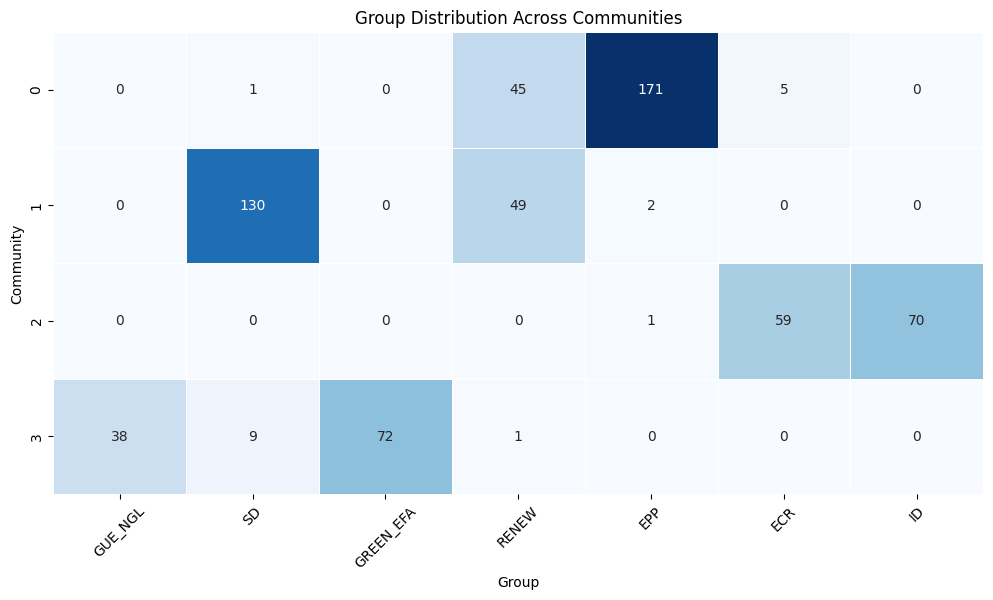

In [51]:
# Analyze and visualize the communities obtained for all bills
community_results_all_bills = analyze_communities(cleaned_edgelist_all_bills)

plot_community_heatmap(community_results_all_bills)

In [52]:
# Export the cleaned edgelist for all bills as a CSV for Gephi visualization
cleaned_edgelist_all_bills.to_csv("../matrices_and_networks/all_bills/edges.csv", index=False)

In [53]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_all_bills
unique_mep_ids = set(cleaned_edgelist_all_bills['Source']).union(set(cleaned_edgelist_all_bills['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/all_bills/nodes.csv", index=False)

<div style="text-align: center;">
    <img src="../images/all_bills.png" alt="Image 1" style="width: 80%; display: inline-block; margin: 0 10px;"/>
</div>

## 3. Years
<a id="#Years"></a>

### 3.1. 2019
<a id="#2019"></a>

In [20]:
# Ensure the 'timestamp' column is in datetime format
bills['timestamp'] = pd.to_datetime(bills['timestamp'])

# Filter for bills from the year 2019
bills_2019 = bills[bills['timestamp'].dt.year == 2019]

In [21]:
# Filter the member_votes dataset to include only voting records corresponding to bills from 2019
member_votes_2019 = member_votes[member_votes['id_bill'].isin(bills_2019['id_bill'])]

In [22]:
# Create the agents and artifacts for all bills from 2019
all_bills_2019 = create_agents_and_artifacts(member_votes_2019)

all_bills_2019

,name,bill_1,bill_2,bill_3,bill_4,bill_5,bill_6,bill_7,bill_8,bill_9,...,bill_80,bill_81,bill_82,bill_83,bill_84,bill_85,bill_86,bill_87,bill_88,bill_89
0,Charles GOERENS (LUX-RENEW),1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),0,0,0,1,1,1,1,1,1,...,1,0,1,1,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,0,0,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,0,1
3,Markus FERBER (DEU-EPP),1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,0,1
4,Peter LIESE (DEU-EPP),1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Marianne VIND (DNK-SD),0,0,0,1,1,0,1,1,1,...,1,0,1,1,1,1,1,1,1,1
611,Isabel CARVALHAIS (PRT-SD),0,0,0,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
612,Sunčana GLAVAK (HRV-EPP),0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
613,Marc ANGEL (LUX-SD),0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,1


In [23]:
# Save the agents and artifacts for all bills from 2019
all_bills_2019.to_csv("../matrices_and_networks/years/2019/agents_and_artifacts_2019.csv", index=False)

In [24]:
# Load the edgelist for all bills from 2019
edgelist_all_bills_2019 = pd.read_csv("../matrices_and_networks/years/2019/edgelist_2019.csv")

# Visualize the edgelist for all bills from 2019
edgelist_all_bills_2019

,from,to,weight
0,Markus FERBER (DEU-EPP),Peter LIESE (DEU-EPP),1
1,Markus FERBER (DEU-EPP),José Manuel GARCÍA-MARGALLO Y MARFIL (ESP-EPP),1
2,Markus FERBER (DEU-EPP),Rainer WIELAND (DEU-EPP),1
3,Markus FERBER (DEU-EPP),Michael GAHLER (DEU-EPP),1
4,Markus FERBER (DEU-EPP),Antonius MANDERS (NLD-EPP),1
...,...,...,...
3434,Liudas MAŽYLIS (LTU-EPP),Andrius KUBILIUS (LTU-EPP),1
3435,Andrius KUBILIUS (LTU-EPP),Maria WALSH (IRL-EPP),1
3436,Sunčana GLAVAK (HRV-EPP),Marc ANGEL (LUX-SD),1
3437,Sunčana GLAVAK (HRV-EPP),Gheorghe-Vlad NISTOR (ROU-EPP),1


In [25]:
# Create the cleaned edgelist of all bills from 2019
cleaned_edgelist_all_bills_2019 = create_clean_edgelist(edgelist_all_bills_2019)

cleaned_edgelist_all_bills_2019

,Source,Target
0,6,7
1,6,8
2,6,12
3,6,13
4,6,28
...,...,...
3434,751,753
3435,753,759
3436,774,775
3437,774,776


In [26]:
# Compute the optimal modularity for all bills from 2019
optimal_modularity_all_bills_2019 = compute_optimal_modularity(cleaned_edgelist_all_bills_2019)

optimal_modularity_all_bills_2019

0.6652935331779624

In [27]:
# Compute the partisan modularity for all bills from 2019
partisan_modularity_all_bills_2019 = compute_partisan_modularity(cleaned_edgelist_all_bills_2019)

partisan_modularity_all_bills_2019

0.5859047068075758

The network is **disconnected** with 35 components.
Removed 31 small components (<20 nodes).


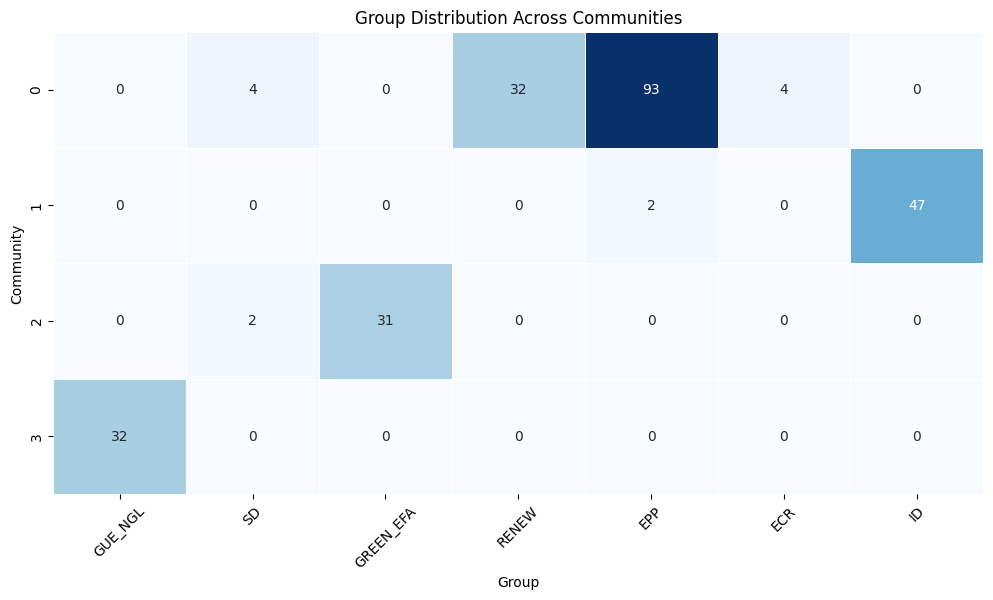

In [28]:
# Analyze and visualize the communities obtained for all bills from 2019
community_results_all_bills_2019 = analyze_communities(cleaned_edgelist_all_bills_2019)

plot_community_heatmap(community_results_all_bills_2019)

In [29]:
# Export the cleaned edgelist for all bills from 2019 as a CSV for Gephi visualization
cleaned_edgelist_all_bills_2019.to_csv("../matrices_and_networks/years/2019/edges.csv", index=False)

In [30]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_all_bills_2019
unique_mep_ids = set(cleaned_edgelist_all_bills_2019['Source']).union(set(cleaned_edgelist_all_bills_2019['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/years/2019/nodes.csv", index=False)

### 3.2. 2020
<a id="#2020"></a>

In [65]:
# Filter for bills from the year 2020
bills_2020 = bills[bills['timestamp'].dt.year == 2020]

In [66]:
# Filter the member_votes dataset to include only voting records corresponding to bills from 2020
member_votes_2020 = member_votes[member_votes['id_bill'].isin(bills_2020['id_bill'])]

In [67]:
# Create the agents and artifacts for all bills from 2020
all_bills_2020 = create_agents_and_artifacts(member_votes_2020)

all_bills_2020

,name,bill_90,bill_91,bill_92,bill_93,bill_94,bill_95,bill_96,bill_97,bill_98,...,bill_381,bill_382,bill_383,bill_384,bill_385,bill_386,bill_387,bill_388,bill_389,bill_390
0,Charles GOERENS (LUX-RENEW),1,0,1,1,1,1,0,1,0,...,1,1,1,1,0,0,0,0,0,1
1,Constanze KREHL (DEU-SD),0,1,1,1,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,0
2,Bernd LANGE (DEU-SD),0,1,1,1,1,0,0,1,0,...,1,1,1,1,1,1,1,1,1,1
3,Markus FERBER (DEU-EPP),1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Peter LIESE (DEU-EPP),1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,Manuela RIPA (DEU-GREEN_EFA),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
644,Sara MATTHIEU (BEL-GREEN_EFA),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
645,Cyrus ENGERER (MLT-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
646,Vlad GHEORGHE (ROU-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,1,1,1


In [68]:
# Save the agents and artifacts for all bills from 2020
all_bills_2020.to_csv("../matrices_and_networks/years/2020/agents_and_artifacts_2020.csv", index=False)

In [69]:
# Load the edgelist for all bills from 2020
edgelist_all_bills_2020 = pd.read_csv("../matrices_and_networks/years/2020/edgelist_2020.csv")

# Visualize the edgelist for all bills from 2020
edgelist_all_bills_2020

,from,to,weight
0,Charles GOERENS (LUX-RENEW),María Soraya RODRÍGUEZ RAMOS (ESP-RENEW),1
1,Charles GOERENS (LUX-RENEW),Maite PAGAZAURTUNDÚA (ESP-RENEW),1
2,Charles GOERENS (LUX-RENEW),Jordi CAÑAS (ESP-RENEW),1
3,Charles GOERENS (LUX-RENEW),Hilde VAUTMANS (BEL-RENEW),1
4,Charles GOERENS (LUX-RENEW),Monica SEMEDO (LUX-RENEW),1
...,...,...,...
14532,Sara MATTHIEU (BEL-GREEN_EFA),Vlad GHEORGHE (ROU-RENEW),1
14533,Sara MATTHIEU (BEL-GREEN_EFA),Colm MARKEY (IRL-EPP),1
14534,Cyrus ENGERER (MLT-SD),Vlad GHEORGHE (ROU-RENEW),1
14535,Cyrus ENGERER (MLT-SD),Colm MARKEY (IRL-EPP),1


In [70]:
# Create the cleaned edgelist of all bills from 2020
cleaned_edgelist_all_bills_2020 = create_clean_edgelist(edgelist_all_bills_2020)

cleaned_edgelist_all_bills_2020

,Source,Target
0,0,18
1,0,304
2,0,324
3,0,330
4,0,392
...,...,...
14532,801,803
14533,801,804
14534,802,803
14535,802,804


In [71]:
# Compute the optimal modularity for all bills from 2020
optimal_modularity_all_bills_2020 = compute_optimal_modularity(cleaned_edgelist_all_bills_2020)

optimal_modularity_all_bills_2020

0.6996051837258769

In [72]:
# Compute the partisan modularity for all bills from 2020
partisan_modularity_all_bills_2020 = compute_partisan_modularity(cleaned_edgelist_all_bills_2020)

partisan_modularity_all_bills_2020

0.6519335708983

The network is **disconnected** with 9 components.
Removed 7 small components (<20 nodes).


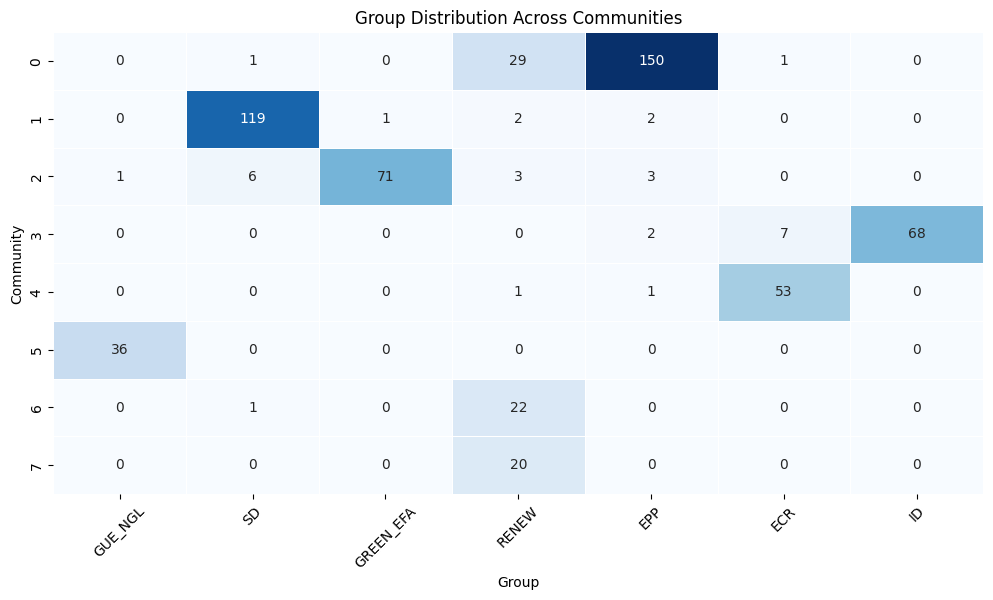

In [73]:
# Analyze and visualize the communities obtained for all bills from 2020
community_results_all_bills_2020 = analyze_communities(cleaned_edgelist_all_bills_2020)

plot_community_heatmap(community_results_all_bills_2020)

<div style="text-align: center;">
    <img src="../images/2020.png" alt="Image 1" style="width: 100%; display: inline-block; margin: 0 10px;"/>
</div>

In [74]:
# Export the cleaned edgelist for all bills from 2020 as a CSV for Gephi visualization
cleaned_edgelist_all_bills_2020.to_csv("../matrices_and_networks/years/2020/edges.csv", index=False)

In [75]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_all_bills_2020
unique_mep_ids = set(cleaned_edgelist_all_bills_2020['Source']).union(set(cleaned_edgelist_all_bills_2020['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/years/2020/nodes.csv", index=False)

### 3.3. 2021
<a id="#2021"></a>

In [76]:
# Filter for bills from the year 2021
bills_2021 = bills[bills['timestamp'].dt.year == 2021]

In [77]:
# Filter the member_votes dataset to include only voting records corresponding to bills from 2021
member_votes_2021 = member_votes[member_votes['id_bill'].isin(bills_2021['id_bill'])]

In [78]:
# Create the agents and artifacts for all bills from 2021
all_bills_2021 = create_agents_and_artifacts(member_votes_2021)

all_bills_2021

,name,bill_391,bill_392,bill_393,bill_394,bill_396,bill_397,bill_398,bill_399,bill_400,...,bill_807,bill_808,bill_809,bill_810,bill_811,bill_812,bill_813,bill_814,bill_815,bill_816
0,Charles GOERENS (LUX-RENEW),1,1,1,1,1,1,1,0,1,...,1,1,0,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),1,1,1,1,1,1,1,0,1,...,1,1,0,1,1,1,0,1,1,1
2,Bernd LANGE (DEU-SD),1,1,1,1,0,0,0,0,0,...,1,1,0,1,1,1,0,1,1,1
3,Markus FERBER (DEU-EPP),1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
4,Peter LIESE (DEU-EPP),1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,Thijs REUTEN (NLD-SD),0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
653,Michiel HOOGEVEEN (NLD-ECR),0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
654,Ladislav ILČIĆ (HRV-ECR),0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,1,1,0,1
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,1,1,1


In [79]:
# Save the agents and artifacts for all bills from 2021
all_bills_2021.to_csv("../matrices_and_networks/years/2021/agents_and_artifacts_2021.csv", index=False)

In [80]:
# Load the edgelist for all bills from 2021
edgelist_all_bills_2021 = pd.read_csv("../matrices_and_networks/years/2021/edgelist_2021.csv")

# Visualize the edgelist for all bills from 2021
edgelist_all_bills_2021

,from,to,weight
0,Charles GOERENS (LUX-RENEW),Sophia IN 'T VELD (NLD-RENEW),1
1,Charles GOERENS (LUX-RENEW),Paolo DE CASTRO (ITA-SD),1
2,Charles GOERENS (LUX-RENEW),Guy VERHOFSTADT (BEL-RENEW),1
3,Charles GOERENS (LUX-RENEW),Nils TORVALDS (FIN-RENEW),1
4,Charles GOERENS (LUX-RENEW),Andrus ANSIP (EST-RENEW),1
...,...,...,...
19144,Claude GRUFFAT (FRA-GREEN_EFA),Sara MATTHIEU (BEL-GREEN_EFA),1
19145,Manuela RIPA (DEU-GREEN_EFA),Sara MATTHIEU (BEL-GREEN_EFA),1
19146,Vlad GHEORGHE (ROU-RENEW),Alin MITUȚA (ROU-RENEW),1
19147,Ladislav ILČIĆ (HRV-ECR),Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),1


In [81]:
# Create the cleaned edgelist of all bills from 2021
cleaned_edgelist_all_bills_2021 = create_clean_edgelist(edgelist_all_bills_2021)

cleaned_edgelist_all_bills_2021

,Source,Target
0,0,58
1,0,157
2,0,173
3,0,197
4,0,209
...,...,...
19144,794,801
19145,800,801
19146,803,805
19147,810,811


In [82]:
# Compute the optimal modularity for all bills from 2021
optimal_modularity_all_bills_2021 = compute_optimal_modularity(cleaned_edgelist_all_bills_2021)

optimal_modularity_all_bills_2021

0.6791249222651945

In [83]:
# Compute the partisan modularity for all bills from 2021
partisan_modularity_all_bills_2021 = compute_partisan_modularity(cleaned_edgelist_all_bills_2021)

partisan_modularity_all_bills_2021

0.6637890365502821

The network is **disconnected** with 4 components.
Removed 3 small components (<20 nodes).


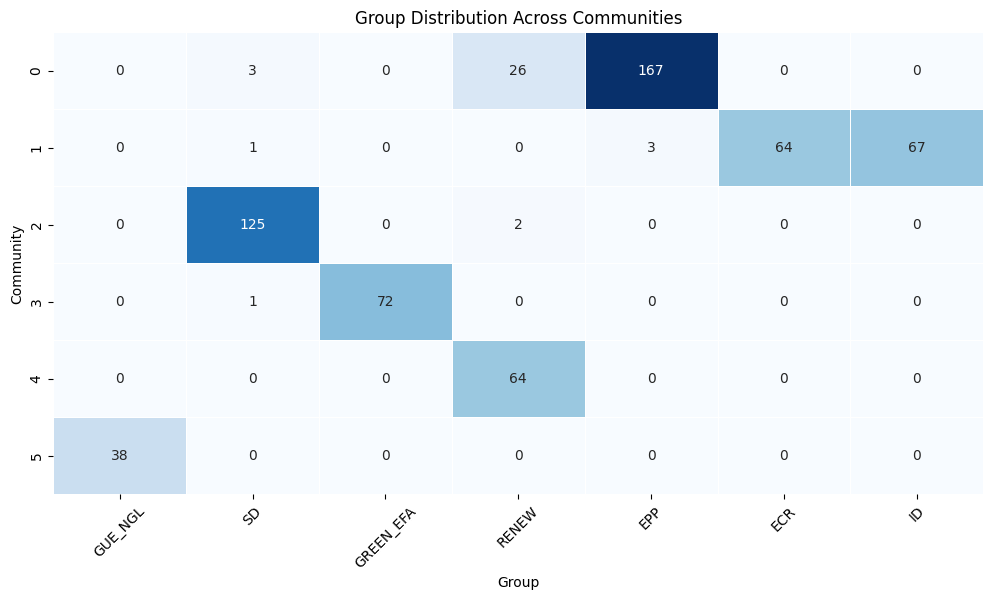

In [84]:
# Analyze and visualize the communities obtained for all bills from 2021
community_results_all_bills_2021 = analyze_communities(cleaned_edgelist_all_bills_2021)

plot_community_heatmap(community_results_all_bills_2021)

In [85]:
# Export the cleaned edgelist for all bills from 2021 as a CSV for Gephi visualization
cleaned_edgelist_all_bills_2021.to_csv("../matrices_and_networks/years/2021/edges.csv", index=False)

In [86]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_all_bills_2021
unique_mep_ids = set(cleaned_edgelist_all_bills_2021['Source']).union(set(cleaned_edgelist_all_bills_2021['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/years/2021/nodes.csv", index=False)

<div style="text-align: center;">
    <img src="../images/2021.png" alt="Image 1" style="width: 100%; display: inline-block; margin: 0 10px;"/>
</div>

### 3.4. 2022
<a id="#2022"></a>

In [87]:
# Filter for bills from the year 2022
bills_2022 = bills[bills['timestamp'].dt.year == 2022]

In [88]:
# Filter the member_votes dataset to include only voting records corresponding to bills from 2022
member_votes_2022 = member_votes[member_votes['id_bill'].isin(bills_2022['id_bill'])]

In [89]:
# Create the agents and artifacts for all bills from 2022
all_bills_2022 = create_agents_and_artifacts(member_votes_2022)

all_bills_2022

,name,bill_817,bill_818,bill_819,bill_820,bill_821,bill_822,bill_823,bill_824,bill_825,...,bill_1183,bill_1184,bill_1185,bill_1186,bill_1187,bill_1188,bill_1189,bill_1190,bill_1191,bill_1192
0,Charles GOERENS (LUX-RENEW),1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,1,1,1
1,Constanze KREHL (DEU-SD),1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,1,1
3,Markus FERBER (DEU-EPP),1,0,0,1,1,1,1,1,1,...,0,1,1,1,1,1,0,0,0,0
4,Peter LIESE (DEU-EPP),1,0,0,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),1,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
656,Ilan DE BASSO (SWE-SD),1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,0,0,1,1,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,1,...,1,1,0,0,1,0,1,1,1,1


In [90]:
# Save the agents and artifacts for all bills from 2022
all_bills_2022.to_csv("../matrices_and_networks/years/2022/agents_and_artifacts_2022.csv", index=False)

In [91]:
# Load the edgelist for all bills from 2022
edgelist_all_bills_2022 = pd.read_csv("../matrices_and_networks/years/2022/edgelist_2022.csv")

# Visualize the edgelist for all bills from 2022
edgelist_all_bills_2022

,from,to,weight
0,Charles GOERENS (LUX-RENEW),Sophia IN 'T VELD (NLD-RENEW),1
1,Charles GOERENS (LUX-RENEW),Juan Fernando LÓPEZ AGUILAR (ESP-SD),1
2,Charles GOERENS (LUX-RENEW),Jana TOOM (EST-RENEW),1
3,Charles GOERENS (LUX-RENEW),Monica SEMEDO (LUX-RENEW),1
4,Charles GOERENS (LUX-RENEW),Ivars IJABS (LVA-RENEW),1
...,...,...,...
12117,Jean-Lin LACAPELLE (FRA-ID),Michiel HOOGEVEEN (NLD-ECR),1
12118,Jean-Lin LACAPELLE (FRA-ID),Ladislav ILČIĆ (HRV-ECR),1
12119,Riho TERRAS (EST-EPP),Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),1
12120,Dorien ROOKMAKER (NLD-ECR),Ladislav ILČIĆ (HRV-ECR),1


In [92]:
# Create the cleaned edgelist of all bills from 2022
cleaned_edgelist_all_bills_2022 = create_clean_edgelist(edgelist_all_bills_2022)

cleaned_edgelist_all_bills_2022

,Source,Target
0,0,58
1,0,142
2,0,210
3,0,392
4,0,571
...,...,...
12117,795,809
12118,795,810
12119,797,811
12120,798,810


In [93]:
# Compute the optimal modularity for all bills from 2022
optimal_modularity_all_bills_2022 = compute_optimal_modularity(cleaned_edgelist_all_bills_2022)

optimal_modularity_all_bills_2022

0.6994602916599895

In [94]:
# Compute the partisan modularity for all bills from 2022
partisan_modularity_all_bills_2022 = compute_partisan_modularity(cleaned_edgelist_all_bills_2022)

partisan_modularity_all_bills_2022

0.5929984197125191

The network is **disconnected** with 2 components.
Removed 1 small components (<20 nodes).


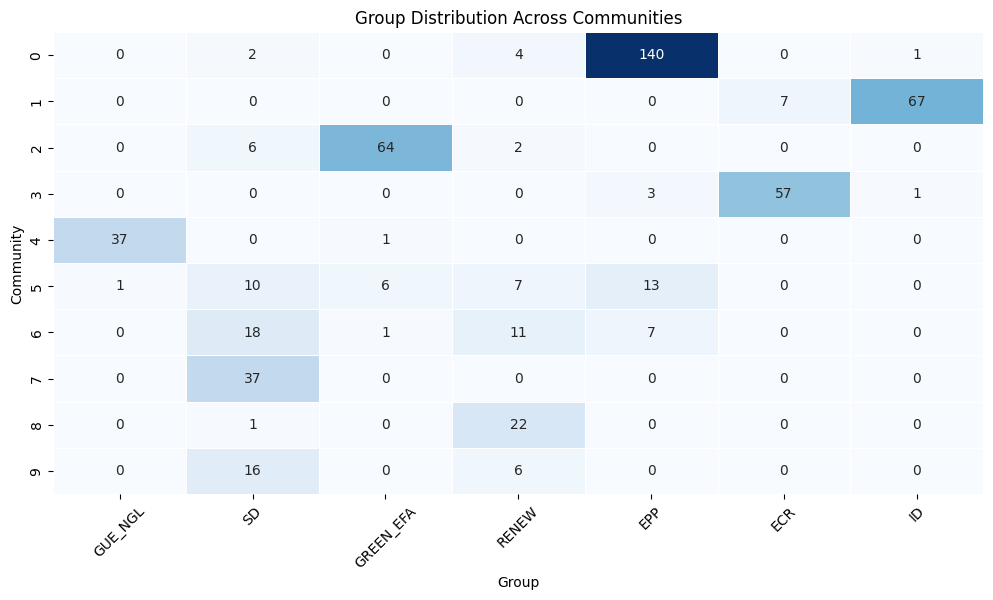

In [95]:
# Analyze and visualize the communities obtained for all bills from 2022
community_results_all_bills_2022 = analyze_communities(cleaned_edgelist_all_bills_2022)

plot_community_heatmap(community_results_all_bills_2022)

In [96]:
# Export the cleaned edgelist for all bills from 2022 as a CSV for Gephi visualization
cleaned_edgelist_all_bills_2022.to_csv("../matrices_and_networks/years/2022/edges.csv", index=False)

In [97]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_all_bills_2022
unique_mep_ids = set(cleaned_edgelist_all_bills_2022['Source']).union(set(cleaned_edgelist_all_bills_2022['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/years/2022/nodes.csv", index=False)

<div style="text-align: center;">
    <img src="../images/2022.png" alt="Image 1" style="width: 100%; display: inline-block; margin: 0 10px;"/>
</div>

### 3.5. 2023
<a id="#2023"></a>

In [98]:
# Filter for bills from the year 2023
bills_2023 = bills[bills['timestamp'].dt.year == 2023]

In [99]:
# Filter the member_votes dataset to include only voting records corresponding to bills from 2023
member_votes_2023 = member_votes[member_votes['id_bill'].isin(bills_2023['id_bill'])]

In [100]:
# Create the agents and artifacts for all bills from 2023
all_bills_2023 = create_agents_and_artifacts(member_votes_2023)

all_bills_2023

,name,bill_1193,bill_1194,bill_1195,bill_1196,bill_1197,bill_1198,bill_1199,bill_1200,bill_1201,...,bill_1593,bill_1594,bill_1595,bill_1596,bill_1597,bill_1598,bill_1599,bill_1600,bill_1601,bill_1602
0,Charles GOERENS (LUX-RENEW),1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
1,Bernd LANGE (DEU-SD),1,1,0,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,0,1
2,Markus FERBER (DEU-EPP),1,1,1,1,0,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
3,Peter LIESE (DEU-EPP),0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,José Manuel GARCÍA-MARGALLO Y MARFIL (ESP-EPP),1,1,0,1,1,1,1,0,1,...,0,0,1,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,1,1,1,1,1
635,Ilan DE BASSO (SWE-SD),1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
636,Catharina RINZEMA (NLD-RENEW),1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
637,René REPASI (DEU-SD),1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [101]:
# Save the agents and artifacts for all bills from 2023
all_bills_2023.to_csv("../matrices_and_networks/years/2023/agents_and_artifacts_2023.csv", index=False)

In [102]:
# Load the edgelist for all bills from 2023
edgelist_all_bills_2023 = pd.read_csv("../matrices_and_networks/years/2023/edgelist_2023.csv")

# Visualize the edgelist for all bills from 2023
edgelist_all_bills_2023

,from,to,weight
0,Charles GOERENS (LUX-RENEW),Marie-Pierre VEDRENNE (FRA-RENEW),1
1,Charles GOERENS (LUX-RENEW),Salima YENBOU (FRA-GREEN_EFA),1
2,Charles GOERENS (LUX-RENEW),Lídia PEREIRA (PRT-EPP),1
3,Charles GOERENS (LUX-RENEW),Marc ANGEL (LUX-SD),1
4,Bernd LANGE (DEU-SD),Heidi HAUTALA (FIN-GREEN_EFA),1
...,...,...,...
9433,Vlad GHEORGHE (ROU-RENEW),Alin MITUȚA (ROU-RENEW),1
9434,Alin MITUȚA (ROU-RENEW),Camilla LAURETI (ITA-SD),1
9435,Emma WIESNER (SWE-RENEW),Catharina RINZEMA (NLD-RENEW),1
9436,Thijs REUTEN (NLD-SD),René REPASI (DEU-SD),1


In [103]:
# Create the cleaned edgelist of all bills from 2023
cleaned_edgelist_all_bills_2023 = create_clean_edgelist(edgelist_all_bills_2023)

cleaned_edgelist_all_bills_2023

,Source,Target
0,0,463
1,0,471
2,0,663
3,0,775
4,4,9
...,...,...
9433,803,805
9434,805,817
9435,807,815
9436,808,816


In [104]:
# Compute the optimal modularity for all bills from 2023
optimal_modularity_all_bills_2023 = compute_optimal_modularity(cleaned_edgelist_all_bills_2023)

optimal_modularity_all_bills_2023

0.6712761262189108

In [105]:
# Compute the partisan modularity for all bills from 2023
partisan_modularity_all_bills_2023 = compute_partisan_modularity(cleaned_edgelist_all_bills_2023)

partisan_modularity_all_bills_2023

0.5590457778878862

The network is **disconnected** with 2 components.
Removed 1 small components (<20 nodes).


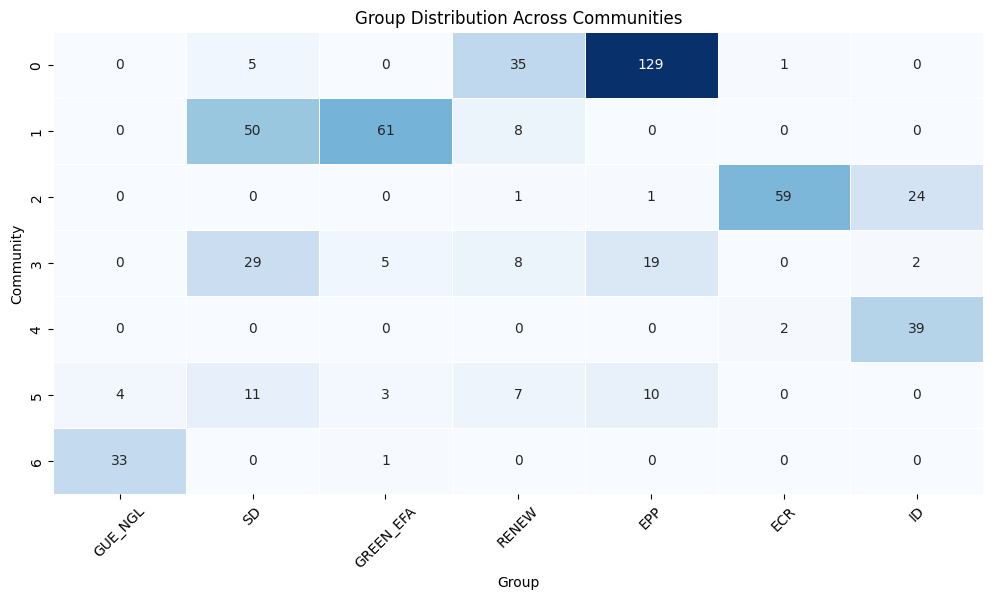

In [106]:
# Analyze and visualize the communities obtained for all bills from 2023
community_results_all_bills_2023 = analyze_communities(cleaned_edgelist_all_bills_2023)

plot_community_heatmap(community_results_all_bills_2023)

In [107]:
# Export the cleaned edgelist for all bills from 2023 as a CSV for Gephi visualization
cleaned_edgelist_all_bills_2023.to_csv("../matrices_and_networks/years/2023/edges.csv", index=False)

In [108]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_all_bills_2023
unique_mep_ids = set(cleaned_edgelist_all_bills_2023['Source']).union(set(cleaned_edgelist_all_bills_2023['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/years/2023/nodes.csv", index=False)

<div style="text-align: center;">
    <img src="../images/2023.png" alt="Image 1" style="width: 100%; display: inline-block; margin: 0 10px;"/>
</div>

### 3.6. 2024
<a id="#2024"></a>

In [109]:
# Filter for bills from the year 2024
bills_2024 = bills[bills['timestamp'].dt.year == 2024]

In [110]:
# Filter the member_votes dataset to include only voting records corresponding to bills from 2024
member_votes_2024 = member_votes[member_votes['id_bill'].isin(bills_2024['id_bill'])]

In [111]:
# Create the agents and artifacts for all bills from 2024
all_bills_2024 = create_agents_and_artifacts(member_votes_2024)

all_bills_2024

,name,bill_1576,bill_1603,bill_1604,bill_1605,bill_1606,bill_1607,bill_1608,bill_1609,bill_1610,...,bill_1894,bill_1895,bill_1896,bill_1897,bill_1898,bill_1899,bill_1900,bill_1901,bill_1902,bill_1903
0,Charles GOERENS (LUX-RENEW),1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Bernd LANGE (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,1
2,Markus FERBER (DEU-EPP),1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,1,1,1
3,Peter LIESE (DEU-EPP),1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,1,1,1
4,José Manuel GARCÍA-MARGALLO Y MARFIL (ESP-EPP),0,0,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,1,1,1
609,Ilan DE BASSO (SWE-SD),1,1,0,1,1,1,1,1,0,...,1,1,1,0,1,1,1,1,1,1
610,Catharina RINZEMA (NLD-RENEW),1,1,1,1,1,1,1,1,1,...,1,0,1,0,1,1,1,1,1,1
611,René REPASI (DEU-SD),1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [112]:
# Save the agents and artifacts for all bills from 2024
all_bills_2024.to_csv("../matrices_and_networks/years/2024/agents_and_artifacts_2024.csv", index=False)

In [113]:
# Load the edgelist for all bills from 2024
edgelist_all_bills_2024 = pd.read_csv("../matrices_and_networks/years/2024/edgelist_2024.csv")

# Visualize the edgelist for all bills from 2024
edgelist_all_bills_2024

,from,to,weight
0,Bernd LANGE (DEU-SD),Lara WOLTERS (NLD-SD),1
1,Bernd LANGE (DEU-SD),Andreas SCHWAB (DEU-EPP),1
2,Bernd LANGE (DEU-SD),Inese VAIDERE (LVA-EPP),1
3,Bernd LANGE (DEU-SD),Rovana PLUMB (ROU-SD),1
4,Bernd LANGE (DEU-SD),Jarosław KALINOWSKI (POL-EPP),1
...,...,...,...
9549,Claude GRUFFAT (FRA-GREEN_EFA),Manuela RIPA (DEU-GREEN_EFA),1
9550,Claude GRUFFAT (FRA-GREEN_EFA),Sara MATTHIEU (BEL-GREEN_EFA),1
9551,Dorien ROOKMAKER (NLD-ECR),Ladislav ILČIĆ (HRV-ECR),1
9552,Manuela RIPA (DEU-GREEN_EFA),Sara MATTHIEU (BEL-GREEN_EFA),1


In [114]:
# Create the cleaned edgelist of all bills from 2024
cleaned_edgelist_all_bills_2024 = create_clean_edgelist(edgelist_all_bills_2024)

cleaned_edgelist_all_bills_2024

,Source,Target
0,4,30
1,4,54
2,4,77
3,4,94
4,4,128
...,...,...
9549,794,800
9550,794,801
9551,798,810
9552,800,801


In [115]:
# Compute the optimal modularity for all bills from 2024
optimal_modularity_all_bills_2024 = compute_optimal_modularity(cleaned_edgelist_all_bills_2024)

optimal_modularity_all_bills_2024

0.6328807903459327

In [116]:
# Compute the partisan modularity for all bills from 2024
partisan_modularity_all_bills_2024 = compute_partisan_modularity(cleaned_edgelist_all_bills_2024)

partisan_modularity_all_bills_2024

0.4109536259172929

The network is **disconnected** with 12 components.
Removed 11 small components (<20 nodes).


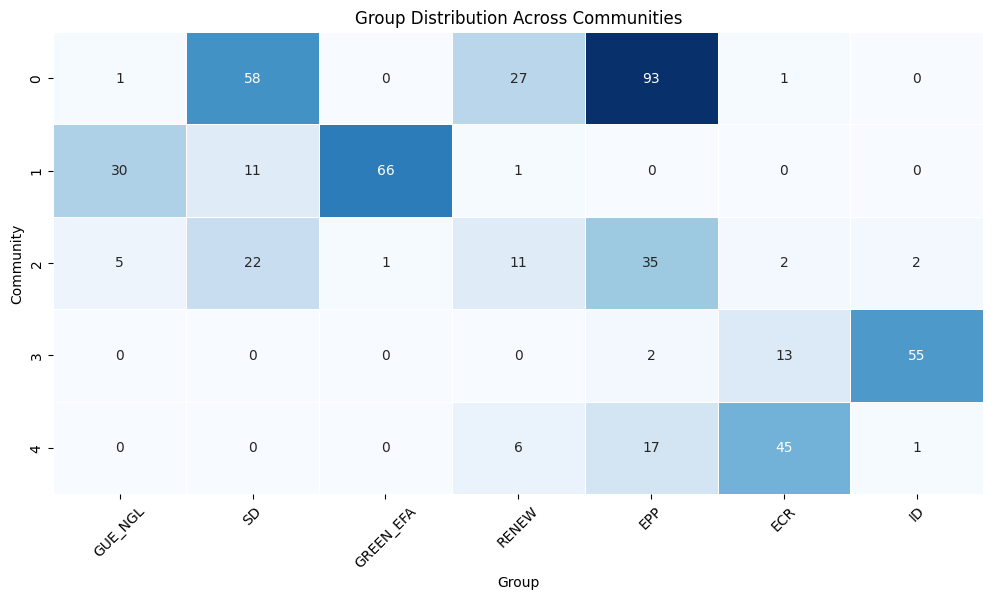

In [117]:
# Analyze and visualize the communities obtained for all bills from 2024
community_results_all_bills_2024 = analyze_communities(cleaned_edgelist_all_bills_2024)

plot_community_heatmap(community_results_all_bills_2024)

In [118]:
# Export the cleaned edgelist for all bills from 2024 as a CSV for Gephi visualization
cleaned_edgelist_all_bills_2024.to_csv("../matrices_and_networks/years/2024/edges.csv", index=False)

In [119]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_all_bills_2024
unique_mep_ids = set(cleaned_edgelist_all_bills_2024['Source']).union(set(cleaned_edgelist_all_bills_2024['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/years/2024/nodes.csv", index=False)

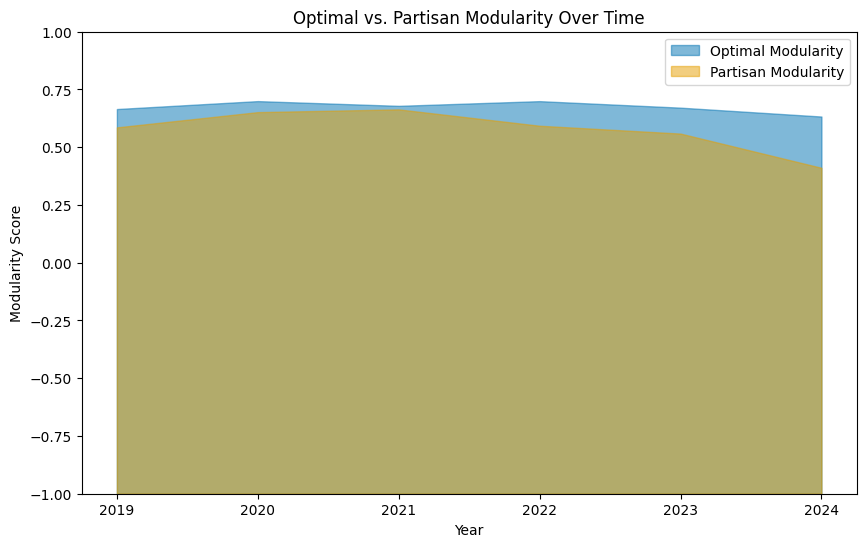

In [120]:
# Define the list of optimal modularities over the years
list_optimal_modularities = [optimal_modularity_all_bills_2019, optimal_modularity_all_bills_2020, optimal_modularity_all_bills_2021, optimal_modularity_all_bills_2022, 
                             optimal_modularity_all_bills_2023, optimal_modularity_all_bills_2024]

# Define the list of partisan modularities over the years
list_partisan_modularities = [partisan_modularity_all_bills_2019, partisan_modularity_all_bills_2020, partisan_modularity_all_bills_2021, partisan_modularity_all_bills_2022,
                              partisan_modularity_all_bills_2023, partisan_modularity_all_bills_2024]

# Define the term years
years = np.arange(2019, 2019 + len(list_optimal_modularities))

# Create the area plot
plt.figure(figsize=(10, 6))

plt.fill_between(years, list_optimal_modularities, -1, color="#0072B2", alpha=0.5, label="Optimal Modularity")
plt.fill_between(years, list_partisan_modularities, -1, color="#E69F00", alpha=0.5, label="Partisan Modularity")

# Plot settings
plt.xlabel("Year")
plt.ylabel("Modularity Score")
plt.title("Optimal vs. Partisan Modularity Over Time")
plt.legend()
plt.ylim(-1, 1)

# Show the plot
plt.show()

## 4. Primary subjects
<a id="#Primary-subjects"></a>

### 4.1. European citizenship
<a id="European-citizenship"></a>

In [39]:
# Filter for only bills whose primary subject is 1 - European citizenship (among any other possible primary subjects)
primary_subject_bills_1 = primary_subject_bills[primary_subject_bills["primary_subject"] == "European citizenship"]

In [40]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose primary subject is 1 (among any other possible primary subjects)
member_votes_1 = member_votes[member_votes['id_bill'].isin(primary_subject_bills_1['id_bill'])]

In [41]:
# Create the agents and artifacts for all bills whose primary subject is 1 (among any other possible primary subjects)
all_bills_primary_subject_1 = create_agents_and_artifacts(member_votes_1)

all_bills_primary_subject_1

,name,bill_4,bill_95,bill_97,bill_117,bill_134,bill_208,bill_231,bill_242,bill_263,...,bill_1686,bill_1719,bill_1734,bill_1737,bill_1745,bill_1773,bill_1847,bill_1850,bill_1876,bill_1888
0,Charles GOERENS (LUX-RENEW),1,1,1,1,0,1,1,0,1,...,1,1,1,1,1,1,1,0,1,1
1,Constanze KREHL (DEU-SD),1,0,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,0,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
3,Markus FERBER (DEU-EPP),1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1
4,Peter LIESE (DEU-EPP),1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1


In [42]:
# Save the agents and artifacts matrix for all bills whose primary subject is 1 (among any other possible primary subjects)
all_bills_primary_subject_1.to_csv("../matrices_and_networks/primary_subjects/1_european_citizenship/agents_and_artifacts_1.csv", index=False)

In [43]:
# Load the edgelist for all bills whose primary subject is 1 (among any other possible primary subjects)
edgelist_1 = pd.read_csv("../matrices_and_networks/primary_subjects/1_european_citizenship/edgelist_1.csv")

# Visualize the edgelist for all bills whose primary subject is 1 (among any other possible primary subjects)
edgelist_1

,from,to,weight
0,Constanze KREHL (DEU-SD),Antonio TAJANI (ITA-EPP),1
1,Constanze KREHL (DEU-SD),Lefteris CHRISTOFOROU (CYP-EPP),1
2,Constanze KREHL (DEU-SD),Ismail ERTUG (DEU-SD),1
3,Constanze KREHL (DEU-SD),Michal ŠIMEČKA (SVK-RENEW),1
4,Constanze KREHL (DEU-SD),Eric ANDRIEU (FRA-SD),1
...,...,...,...
3255,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),Camilla LAURETI (ITA-SD),1
3256,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
3257,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
3258,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [44]:
# Create the cleaned edgelist of all bills whose primary subject is 1 (among any other possible primary subjects)
cleaned_edgelist_1 = create_clean_edgelist(edgelist_1)

cleaned_edgelist_1

,Source,Target
0,2,10
1,2,46
2,2,149
3,2,186
4,2,195
...,...,...
3255,811,817
3256,813,816
3257,815,816
3258,815,817


In [45]:
# Compute the optimal modularity for all bills whose primary subject is 1 (among any other possible primary subjects)
optimal_modularity_1 = compute_optimal_modularity(cleaned_edgelist_1)

optimal_modularity_1

0.48301681470887126

In [46]:
# Compute the partisan modularity for all bills whose primary subject is 1 (among any other possible primary subjects)
partisan_modularity_1 = compute_partisan_modularity(cleaned_edgelist_1)

partisan_modularity_1

0.4121588599495653

The network is **disconnected** with 9 components.
Removed 8 small components (<20 nodes).


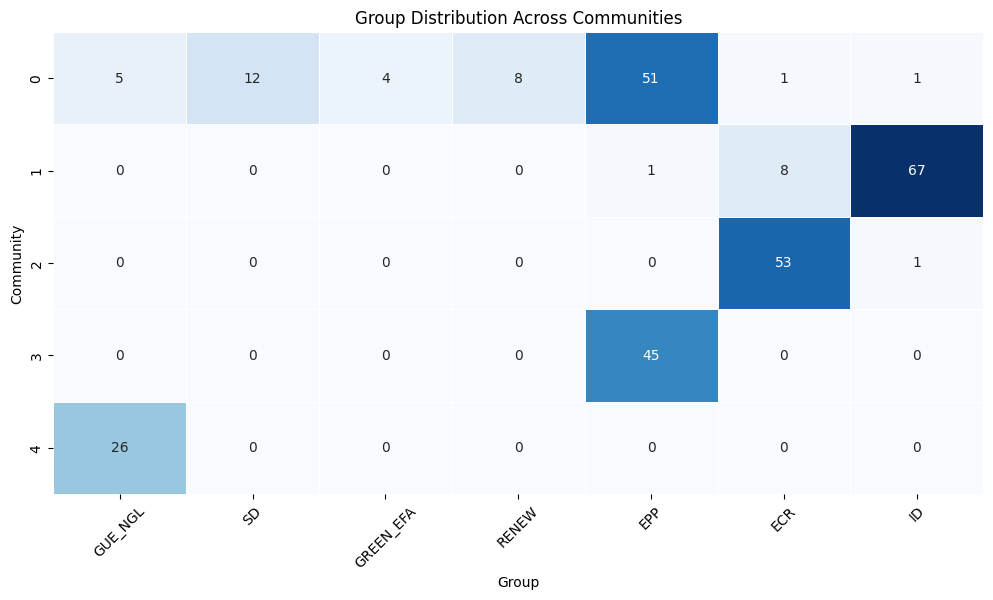

In [47]:
# Analyze and visualize the communities obtained for all bills whose primary subject is 1 (among any other possible primary subjects)
community_results_1 = analyze_communities(cleaned_edgelist_1)

plot_community_heatmap(community_results_1)

In [48]:
# Export the edges file as a CSV
cleaned_edgelist_1.to_csv("../matrices_and_networks/primary_subjects/1_european_citizenship/edges.csv", index=False)

In [49]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_1
unique_mep_ids = set(cleaned_edgelist_1['Source']).union(set(cleaned_edgelist_1['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/primary_subjects/1_european_citizenship/nodes.csv", index=False)

<div style="text-align: center;">
    <img src="../images/1_european_citizenship.png" alt="Image 1" style="width: 100%; display: inline-block; margin: 0 10px;"/>
</div>

### 4.2. Internal market, single market
<a id="Internal-market-single-market"></a>

In [20]:
# Filter for only bills whose primary subject is 2 - Internal market, single market (among any other possible primary subjects)
primary_subject_bills_2 = primary_subject_bills[primary_subject_bills["primary_subject"] == "Internal market, single market"]

In [21]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose primary subject is 2 (among any other possible primary subjects)
member_votes_2 = member_votes[member_votes['id_bill'].isin(primary_subject_bills_2['id_bill'])]

In [22]:
# Create the agents and artifacts for all bills whose primary subject is 2 (among any other possible primary subjects)
all_bills_primary_subject_2 = create_agents_and_artifacts(member_votes_2)

all_bills_primary_subject_2

,name,bill_43,bill_51,bill_73,bill_74,bill_82,bill_93,bill_104,bill_115,bill_209,...,bill_1855,bill_1859,bill_1861,bill_1862,bill_1863,bill_1865,bill_1878,bill_1879,bill_1881,bill_1883
0,Charles GOERENS (LUX-RENEW),1,1,1,1,0,1,0,0,1,...,0,1,1,1,1,0,1,1,1,1
1,Constanze KREHL (DEU-SD),1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,1,1,1,1,1,1,0,1,...,0,1,1,1,1,0,0,1,0,0
3,Markus FERBER (DEU-EPP),1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,0,0
4,Peter LIESE (DEU-EPP),0,0,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,1,0,0
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,1,1,0


In [23]:
# Save the agents and artifacts for all bills whose primary subject is 2 (among any other possible primary subjects)
all_bills_primary_subject_2.to_csv("../matrices_and_networks/primary_subjects/2_internal_market_single_market/agents_and_artifacts_2.csv", index=False)

In [24]:
# Load the edgelist for all bills whose primary subject is 2 (among any other possible primary subjects)
edgelist_2 = pd.read_csv("../matrices_and_networks/primary_subjects/2_internal_market_single_market/edgelist_2.csv")

# Visualize the edgelist for all bills whose primary subject is 2 (among any other possible primary subjects)
edgelist_2

,from,to,weight
0,Constanze KREHL (DEU-SD),Antonio TAJANI (ITA-EPP),1
1,Constanze KREHL (DEU-SD),Raffaele FITTO (ITA-ECR),1
2,Constanze KREHL (DEU-SD),Lefteris CHRISTOFOROU (CYP-EPP),1
3,Constanze KREHL (DEU-SD),Yannick JADOT (FRA-GREEN_EFA),1
4,Constanze KREHL (DEU-SD),Michèle RIVASI (FRA-GREEN_EFA),1
...,...,...,...
5265,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
5266,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
5267,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
5268,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [25]:
# Create the cleaned edgelist of all bills whose primary subject is 2 (among any other possible primary subjects)
cleaned_edgelist_2 = create_clean_edgelist(edgelist_2)

cleaned_edgelist_2

,Source,Target
0,2,10
1,2,20
2,2,46
3,2,121
4,2,122
...,...,...
5265,813,816
5266,813,817
5267,815,816
5268,815,817


In [26]:
# Compute the optimal modularity for all bills whose primary subject is 2 (among any other possible primary subjects)
optimal_modularity_2 = compute_optimal_modularity(cleaned_edgelist_2)

optimal_modularity_2

0.7178029301945417

In [27]:
# Compute the partisan modularity for all bills whose primary subject is 2 (among any other possible primary subjects)
partisan_modularity_2 = compute_partisan_modularity(cleaned_edgelist_2)

partisan_modularity_2

0.6091993093987305

The network is **disconnected** with 23 components.
Removed 22 small components (<20 nodes).


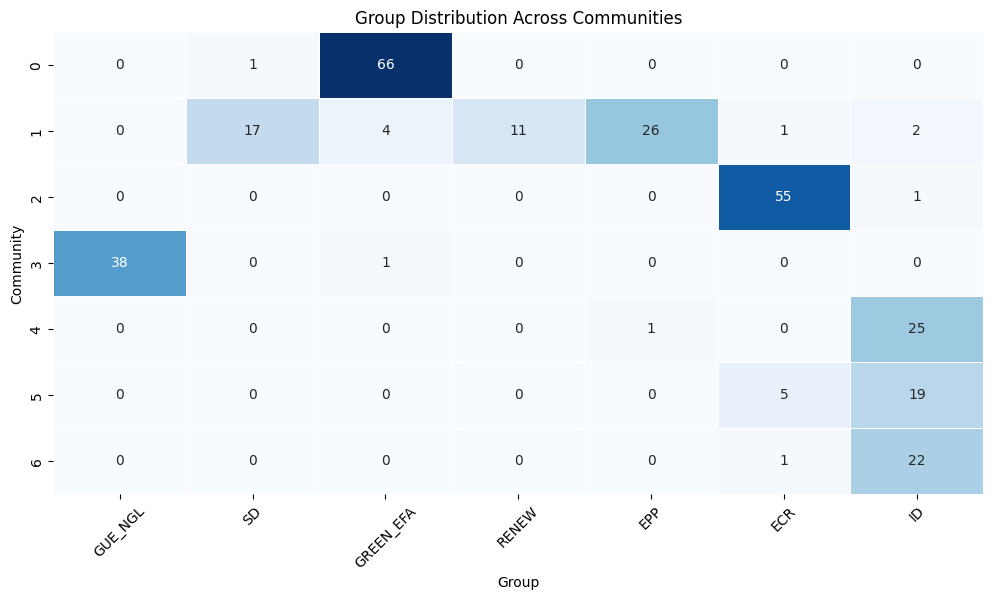

In [28]:
# Analyze and visualize the communities obtained for all bills whose primary subject is 2 (among any other possible primary subjects)
community_results_2 = analyze_communities(cleaned_edgelist_2)

plot_community_heatmap(community_results_2)

In [29]:
# Export the edges file as a CSV
cleaned_edgelist_2.to_csv("../matrices_and_networks/primary_subjects/2_internal_market_single_market/edges.csv", index=False)

In [30]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_2
unique_mep_ids = set(cleaned_edgelist_2['Source']).union(set(cleaned_edgelist_2['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/primary_subjects/2_internal_market_single_market/nodes.csv", index=False)

### 4.3. Community policies
<a id="Community-policies"></a>

In [61]:
# Filter for only bills whose primary subject is 3 - Community policies (among any other possible primary subjects)
primary_subject_bills_3 = primary_subject_bills[primary_subject_bills["primary_subject"] == "Community policies"]

In [62]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose primary subject is 3 (among any other possible primary subjects)
member_votes_3 = member_votes[member_votes['id_bill'].isin(primary_subject_bills_3['id_bill'])]

In [63]:
# Create the agents and artifacts for all bills whose primary subject is 3 (among any other possible primary subjects)
all_bills_primary_subject_3 = create_agents_and_artifacts(member_votes_3)

all_bills_primary_subject_3

,name,bill_6,bill_18,bill_20,bill_21,bill_22,bill_23,bill_24,bill_27,bill_32,...,bill_1869,bill_1873,bill_1876,bill_1882,bill_1886,bill_1887,bill_1889,bill_1890,bill_1895,bill_1903
0,Charles GOERENS (LUX-RENEW),1,1,1,0,0,0,0,1,1,...,1,1,1,1,1,1,1,0,1,1
1,Constanze KREHL (DEU-SD),1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,1,1,1,1,1,1,1,1,...,0,1,1,0,0,0,0,1,0,1
3,Markus FERBER (DEU-EPP),1,1,0,0,0,0,0,1,1,...,1,1,1,0,1,1,1,0,0,1
4,Peter LIESE (DEU-EPP),1,1,0,0,0,0,0,1,1,...,1,1,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,0,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,0,0,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,1,1,1


In [64]:
# Save the agents and artifacts matrix for all bills whose primary subject is 3 (among any other possible primary subjects)
all_bills_primary_subject_3.to_csv("../matrices_and_networks/primary_subjects/3_community_policies/agents_and_artifacts_3.csv", index=False)

In [65]:
# Load the edgelist for all bills whose primary subject is 3 (among any other possible primary subjects)
edgelist_3 = pd.read_csv("../matrices_and_networks/primary_subjects/3_community_policies/edgelist_3.csv")

# Visualize the edgelist for all bills whose primary subject is 3 (among any other possible primary subjects)
edgelist_3

,from,to,weight
0,Charles GOERENS (LUX-RENEW),Peter LIESE (DEU-EPP),1
1,Charles GOERENS (LUX-RENEW),Antonius MANDERS (NLD-EPP),1
2,Charles GOERENS (LUX-RENEW),Fabienne KELLER (FRA-RENEW),1
3,Charles GOERENS (LUX-RENEW),Sophia IN 'T VELD (NLD-RENEW),1
4,Charles GOERENS (LUX-RENEW),Jan OLBRYCHT (POL-EPP),1
...,...,...,...
24812,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
24813,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
24814,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
24815,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [66]:
# Create the cleaned edgelist of all bills whose primary subject is 3 (among any other possible primary subjects)
cleaned_edgelist_3 = create_clean_edgelist(edgelist_3)

cleaned_edgelist_3

,Source,Target
0,0,7
1,0,28
2,0,33
3,0,58
4,0,60
...,...,...
24812,813,816
24813,813,817
24814,815,816
24815,815,817


In [67]:
# Compute the optimal modularity for all bills whose primary subject is 3 (among any other possible primary subjects)
optimal_modularity_3 = compute_optimal_modularity(cleaned_edgelist_3)

optimal_modularity_3

0.5528344899338582

In [68]:
### Compute the partisan modularity for all bills whose primary subject is 3 (among any other possible primary subjects)
partisan_modularity_3 = compute_partisan_modularity(cleaned_edgelist_3)

partisan_modularity_3

0.4126843177963487

The network is **connected**. Running Louvain community detection on the full graph.


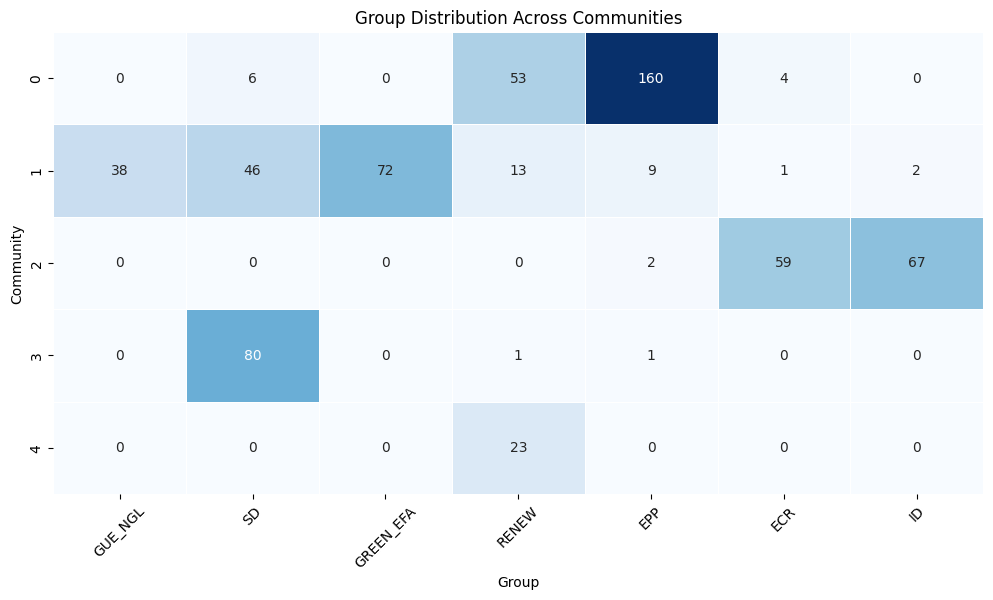

In [69]:
# Analyze and visualize the communities obtained for all bills whose primary subject is 3 (among any other possible primary subjects)
community_results_3 = analyze_communities(cleaned_edgelist_3)

plot_community_heatmap(community_results_3)

In [70]:
# Export the edges file as a CSV
cleaned_edgelist_3.to_csv("../matrices_and_networks/primary_subjects/3_community_policies/edges.csv", index=False)

In [71]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_3
unique_mep_ids = set(cleaned_edgelist_3['Source']).union(set(cleaned_edgelist_3['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/primary_subjects/3_community_policies/nodes.csv", index=False)

### 4.4. Economic, social and territorial cohesion
<a id="Economic-social-and-territorial-cohesion"></a>

In [72]:
# Filter for only bills whose primary subject is 4 - Economic, social and territorial cohesion (among any other possible primary subjects)
primary_subject_bills_4 = primary_subject_bills[primary_subject_bills["primary_subject"] == "Economic, social and territorial cohesion"]

In [73]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose primary subject is 4 (among any other possible primary subjects)
member_votes_4 = member_votes[member_votes['id_bill'].isin(primary_subject_bills_4['id_bill'])]

In [74]:
# Create the agents and artifacts for all bills whose primary subject is 4 (among any other possible primary subjects)
all_bills_primary_subject_4 = create_agents_and_artifacts(member_votes_4)

all_bills_primary_subject_4

,name,bill_5,bill_12,bill_19,bill_28,bill_38,bill_44,bill_49,bill_52,bill_64,...,bill_1865,bill_1866,bill_1867,bill_1876,bill_1877,bill_1879,bill_1883,bill_1884,bill_1895,bill_1902
0,Charles GOERENS (LUX-RENEW),1,1,1,1,1,1,1,0,0,...,0,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),1,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,1,1,1,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
3,Markus FERBER (DEU-EPP),1,1,0,1,0,1,1,0,0,...,1,1,1,1,1,1,0,1,0,1
4,Peter LIESE (DEU-EPP),1,1,1,1,0,0,0,0,0,...,1,1,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,1,0,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,0,1,1,1


In [75]:
# Save the agents and artifacts for all bills whose primary subject is 4 (among any other possible primary subjects)
all_bills_primary_subject_4.to_csv("../matrices_and_networks/primary_subjects/4_economic_social_and_territorial_cohesion/agents_and_artifacts_4.csv", index=False)

In [76]:
# Load the edgelist for all bills whose primary subject is 4 (among any other possible primary subjects)
edgelist_4 = pd.read_csv("../matrices_and_networks/primary_subjects/4_economic_social_and_territorial_cohesion/edgelist_4.csv")

# Visualize the edgelist for all bills whose primary subject is 4 (among any other possible primary subjects)
edgelist_4

,from,to,weight
0,Constanze KREHL (DEU-SD),Antonio TAJANI (ITA-EPP),1
1,Constanze KREHL (DEU-SD),Raffaele FITTO (ITA-ECR),1
2,Constanze KREHL (DEU-SD),Lara WOLTERS (NLD-SD),1
3,Constanze KREHL (DEU-SD),Lefteris CHRISTOFOROU (CYP-EPP),1
4,Constanze KREHL (DEU-SD),Aldo PATRICIELLO (ITA-EPP),1
...,...,...,...
11211,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
11212,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
11213,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
11214,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [77]:
# Create the cleaned edgelist of all bills whose primary subject is 4 (among any other possible primary subjects)
cleaned_edgelist_4 = create_clean_edgelist(edgelist_4)

cleaned_edgelist_4

,Source,Target
0,2,10
1,2,20
2,2,30
3,2,46
4,2,86
...,...,...
11211,813,816
11212,813,817
11213,815,816
11214,815,817


In [78]:
# Compute the optimal modularity for all bills whose primary subject is 4 (among any other possible primary subjects)
optimal_modularity_4 = compute_optimal_modularity(cleaned_edgelist_4)

optimal_modularity_4

0.6621902582170671

In [79]:
# Compute the partisan modularity for all bills whose primary subject is 4 (among any other possible primary subjects)
partisan_modularity_4 = compute_partisan_modularity(cleaned_edgelist_4)

partisan_modularity_4

0.5492330061141512

The network is **disconnected** with 3 components.
Removed 2 small components (<20 nodes).


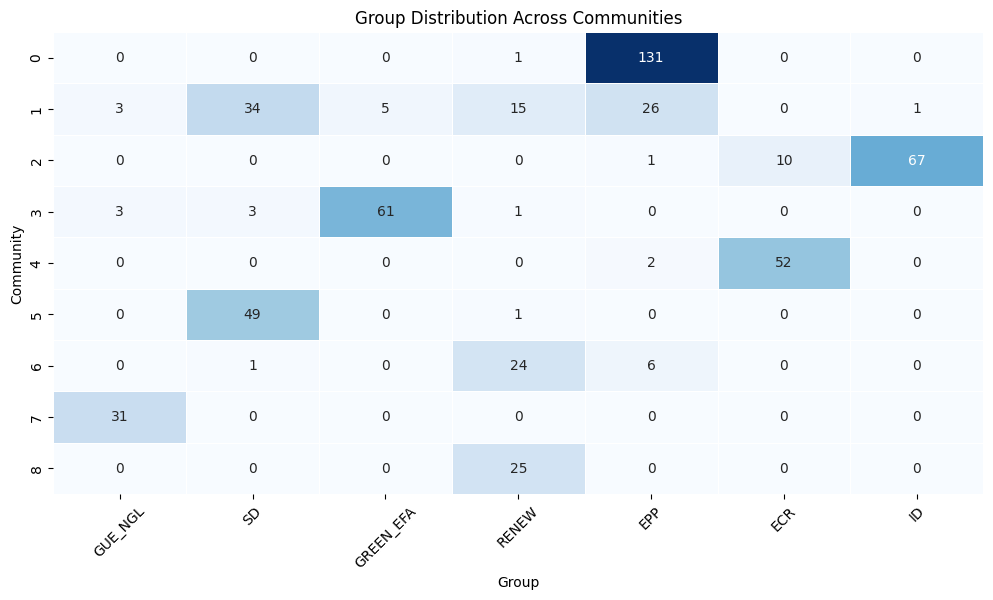

In [80]:
# Analyze and visualize the communities obtained for all bills whose primary subject is 4 (among any other possible primary subjects)
community_results_4 = analyze_communities(cleaned_edgelist_4)

plot_community_heatmap(community_results_4)

In [81]:
# Export the edges file as a CSV
cleaned_edgelist_4.to_csv("../matrices_and_networks/primary_subjects/4_economic_social_and_territorial_cohesion/edges.csv", index=False)

In [82]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_4
unique_mep_ids = set(cleaned_edgelist_4['Source']).union(set(cleaned_edgelist_4['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/primary_subjects/4_economic_social_and_territorial_cohesion/nodes.csv", index=False)

### 4.5. Economic and monetary system
<a id="Economic-and-monetary-system"></a>

In [83]:
# Filter for only bills whose primary subject is 5 - Economic and monetary system (among any other possible primary subjects)
primary_subject_bills_5 = primary_subject_bills[primary_subject_bills["primary_subject"] == "Economic and monetary system"]

In [84]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose primary subject is 5 (among any other possible primary subjects)
member_votes_5 = member_votes[member_votes['id_bill'].isin(primary_subject_bills_5['id_bill'])]

In [85]:
# Create the agents and artifacts for all bills whose primary subject is 5 (among any other possible primary subjects)
all_bills_primary_subject_5 = create_agents_and_artifacts(member_votes_5)

all_bills_primary_subject_5

,name,bill_19,bill_28,bill_112,bill_306,bill_307,bill_420,bill_437,bill_448,bill_470,...,bill_1372,bill_1624,bill_1652,bill_1676,bill_1707,bill_1723,bill_1853,bill_1870,bill_1871,bill_1872
0,Charles GOERENS (LUX-RENEW),1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,1,1,1,1,1,0,1,1,...,1,0,1,1,1,1,1,0,1,0
3,Markus FERBER (DEU-EPP),0,1,1,0,1,1,0,1,1,...,1,0,1,1,1,0,1,1,1,1
4,Peter LIESE (DEU-EPP),1,1,1,0,1,1,0,1,1,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,1,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,1,1,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,1,1,1,1


In [86]:
# Save the agents and artifacts for all bills whose primary subject is 5 (among any other possible primary subjects)
all_bills_primary_subject_5.to_csv("../matrices_and_networks/primary_subjects/5_economic_and_monetary_system/agents_and_artifacts_5.csv", index=False)

In [87]:
# Load the edgelist for all bills whose primary subject is 5 (among any other possible primary subjects)
edgelist_5 = pd.read_csv("../matrices_and_networks/primary_subjects/5_economic_and_monetary_system/edgelist_5.csv")

# Visualize the edgelist for all bills whose primary subject is 5 (among any other possible primary subjects)
edgelist_5

,from,to,weight
0,Constanze KREHL (DEU-SD),Manuel PIZARRO (PRT-SD),1
1,Adam BIELAN (POL-ECR),Jadwiga WIŚNIEWSKA (POL-ECR),1
2,Adam BIELAN (POL-ECR),Geert BOURGEOIS (BEL-ECR),1
3,Adam BIELAN (POL-ECR),Beata KEMPA (POL-ECR),1
4,Adam BIELAN (POL-ECR),Dominik TARCZYŃSKI (POL-ECR),1
...,...,...,...
212,Anna BONFRISCO (ITA-ID),Valentino GRANT (ITA-ID),1
213,Jorge BUXADÉ VILLALBA (ESP-ECR),Mazaly AGUILAR (ESP-ECR),1
214,Jorge BUXADÉ VILLALBA (ESP-ECR),Margarita DE LA PISA CARRIÓN (ESP-ECR),1
215,Hermann TERTSCH (ESP-ECR),Margarita DE LA PISA CARRIÓN (ESP-ECR),1


In [88]:
# Create the cleaned edgelist of all bills whose primary subject is 5 (among any other possible primary subjects)
cleaned_edgelist_5 = create_clean_edgelist(edgelist_5)

cleaned_edgelist_5

,Source,Target
0,2,657
1,38,270
2,38,436
3,38,479
4,38,785
...,...,...
212,704,714
213,742,767
214,742,790
215,743,790


In [89]:
# Compute the optimal modularity for all bills whose primary subject is 5 (among any other possible primary subjects)
optimal_modularity_5 = compute_optimal_modularity(cleaned_edgelist_5)

optimal_modularity_5

0.8034148102529256

In [90]:
# Compute the partisan modularity for all bills whose primary subject is 5 (among any other possible primary subjects)
partisan_modularity_5 = compute_partisan_modularity(cleaned_edgelist_5)

partisan_modularity_5

0.48369045849349107

In [91]:
# Analyze and visualize the communities obtained for all bills whose primary subject is 5 (among any other possible primary subjects)
community_results_5 = analyze_communities(cleaned_edgelist_5)

plot_community_heatmap(community_results_5)

The network is **disconnected** with 20 components.
Removed 20 small components (<20 nodes).


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x600 with 0 Axes>

### 4.6. External relations of the Union
<a id="External-relations-of-the-Union"></a>

In [92]:
# Filter for only bills whose primary subject is 6 - External relations of the Union (among any other possible primary subjects)
primary_subject_bills_6 = primary_subject_bills[primary_subject_bills["primary_subject"] == "External relations of the Union"]

In [93]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose primary subject is 6 (among any other possible primary subjects)
member_votes_6 = member_votes[member_votes['id_bill'].isin(primary_subject_bills_6['id_bill'])]

In [94]:
# Create the agents and artifacts for all bills whose primary subject is 6 (among any other possible primary subjects)
all_bills_primary_subject_6 = create_agents_and_artifacts(member_votes_6)

all_bills_primary_subject_6

,name,bill_1,bill_3,bill_12,bill_13,bill_14,bill_36,bill_39,bill_40,bill_41,...,bill_1852,bill_1856,bill_1876,bill_1880,bill_1895,bill_1898,bill_1899,bill_1900,bill_1901,bill_1902
0,Charles GOERENS (LUX-RENEW),1,1,1,0,1,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,0,1,0,1,0,1,0,0,...,0,1,1,1,0,1,1,1,1,1
3,Markus FERBER (DEU-EPP),1,1,1,0,1,0,1,0,0,...,1,1,1,1,0,1,1,1,1,1
4,Peter LIESE (DEU-EPP),1,1,1,0,1,0,1,0,0,...,1,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,1,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,1,1,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [95]:
# Save the agents and artifacts for all bills whose primary subject is 6 (among any other possible primary subjects)
all_bills_primary_subject_6.to_csv("../matrices_and_networks/primary_subjects/6_external_relations_of_the_union/agents_and_artifacts_6.csv", index=False)

In [96]:
# Load the edgelist for all bills whose primary subject is 6 (among any other possible primary subjects)
edgelist_6 = pd.read_csv("../matrices_and_networks/primary_subjects/6_external_relations_of_the_union/edgelist_6.csv")

# Visualize the edgelist for all bills whose primary subject is 6 (among any other possible primary subjects)
edgelist_6

,from,to,weight
0,Charles GOERENS (LUX-RENEW),Sophia IN 'T VELD (NLD-RENEW),1
1,Charles GOERENS (LUX-RENEW),Nils TORVALDS (FIN-RENEW),1
2,Charles GOERENS (LUX-RENEW),Petras AUŠTREVIČIUS (LTU-RENEW),1
3,Charles GOERENS (LUX-RENEW),Nicola DANTI (ITA-RENEW),1
4,Charles GOERENS (LUX-RENEW),Marie-Pierre VEDRENNE (FRA-RENEW),1
...,...,...,...
13436,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
13437,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
13438,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
13439,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [97]:
# Create the cleaned edgelist of all bills whose primary subject is 6 (among any other possible primary subjects)
cleaned_edgelist_6 = create_clean_edgelist(edgelist_6)

cleaned_edgelist_6

,Source,Target
0,0,58
1,0,197
2,0,230
3,0,248
4,0,463
...,...,...
13436,813,816
13437,813,817
13438,815,816
13439,815,817


In [98]:
# Compute the optimal modularity for all bills whose primary subject is 6 (among any other possible primary subjects)
optimal_modularity_6 = compute_optimal_modularity(cleaned_edgelist_6)

optimal_modularity_6

0.7149613810670635

In [99]:
# Compute the partisan modularity for all bills whose primary subject is 6 (among any other possible primary subjects)
partisan_modularity_6 = compute_partisan_modularity(cleaned_edgelist_6)

partisan_modularity_6

0.6054914162439322

The network is **disconnected** with 2 components.
Removed 1 small components (<20 nodes).


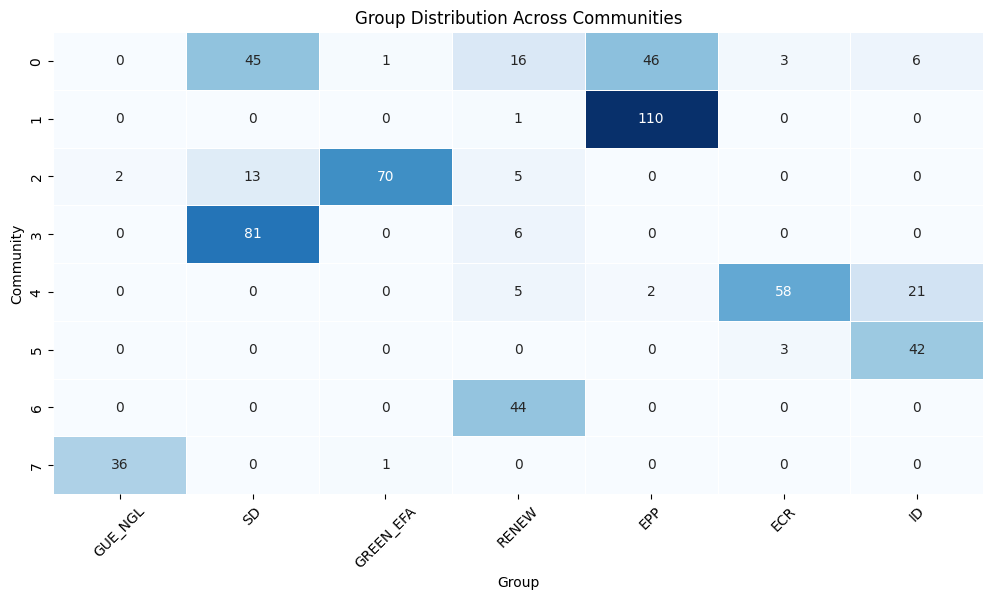

In [100]:
# Analyze and visualize the communities obtained for all bills whose primary subject is 6 (among any other possible primary subjects)
community_results_6 = analyze_communities(cleaned_edgelist_6)

plot_community_heatmap(community_results_6)

In [101]:
# Export the edges file as a CSV
cleaned_edgelist_6.to_csv("../matrices_and_networks/primary_subjects/6_external_relations_of_the_union/edges.csv", index=False)

In [102]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_6
unique_mep_ids = set(cleaned_edgelist_6['Source']).union(set(cleaned_edgelist_6['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/primary_subjects/6_external_relations_of_the_union/nodes.csv", index=False)

### 4.7. Area of freedom, security and justice
<a id="Area-of-freedom-security-and-justice"></a>

In [103]:
# Filter for only bills whose primary subject is 7 - Area of freedom, security and justice (among any other possible primary subjects)
primary_subject_bills_7 = primary_subject_bills[primary_subject_bills["primary_subject"] == "Area of freedom, security and justice"]

In [104]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose primary subject is 7 (among any other possible primary subjects)
member_votes_7 = member_votes[member_votes['id_bill'].isin(primary_subject_bills_7['id_bill'])]

In [105]:
# Create the agents and artifacts for all bills whose primary subject is 7 (among any other possible primary subjects)
all_bills_primary_subject_7 = create_agents_and_artifacts(member_votes_7)

all_bills_primary_subject_7

,name,bill_2,bill_4,bill_11,bill_15,bill_17,bill_37,bill_54,bill_64,bill_69,...,bill_1851,bill_1854,bill_1856,bill_1859,bill_1871,bill_1874,bill_1875,bill_1884,bill_1885,bill_1891
0,Charles GOERENS (LUX-RENEW),1,1,1,1,0,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),0,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),0,1,1,1,0,1,1,0,1,...,1,1,1,1,1,1,1,0,1,1
3,Markus FERBER (DEU-EPP),1,1,1,1,0,0,1,0,1,...,1,1,1,1,1,1,1,1,1,1
4,Peter LIESE (DEU-EPP),1,1,1,1,0,0,1,0,1,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1


In [106]:
# Save the agents and artifacts for all bills whose primary subject is 7 (among any other possible primary subjects)
all_bills_primary_subject_7.to_csv("../matrices_and_networks/primary_subjects/7_area_of_freedom_security_and_justice/agents_and_artifacts_7.csv", index=False)

In [107]:
# Load the edgelist for all bills whose primary subject is 7 (among any other possible primary subjects)
edgelist_7 = pd.read_csv("../matrices_and_networks/primary_subjects/7_area_of_freedom_security_and_justice/edgelist_7.csv")

# Visualize the edgelist for all bills whose primary subject is 7 (among any other possible primary subjects)
edgelist_7

,from,to,weight
0,Constanze KREHL (DEU-SD),Antonio TAJANI (ITA-EPP),1
1,Constanze KREHL (DEU-SD),Raffaele FITTO (ITA-ECR),1
2,Constanze KREHL (DEU-SD),Lefteris CHRISTOFOROU (CYP-EPP),1
3,Constanze KREHL (DEU-SD),Ismail ERTUG (DEU-SD),1
4,Constanze KREHL (DEU-SD),Mara BIZZOTTO (ITA-ID),1
...,...,...,...
8420,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
8421,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
8422,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
8423,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [108]:
# Create the cleaned edgelist of all bills whose primary subject is 7 (among any other possible primary subjects)
cleaned_edgelist_7 = create_clean_edgelist(edgelist_7)

cleaned_edgelist_7

,Source,Target
0,2,10
1,2,20
2,2,46
3,2,149
4,2,175
...,...,...
8420,813,816
8421,813,817
8422,815,816
8423,815,817


In [109]:
# Compute the optimal modularity for all bills whose primary subject is 7 (among any other possible primary subjects)
optimal_modularity_7 = compute_optimal_modularity(cleaned_edgelist_7)

optimal_modularity_7

0.606554767586225

In [110]:
# Compute the partisan modularity for all bills whose primary subject is 7 (among any other possible primary subjects)
partisan_modularity_7 = compute_partisan_modularity(cleaned_edgelist_7)

partisan_modularity_7

0.522429127666881

The network is **disconnected** with 21 components.
Removed 20 small components (<20 nodes).


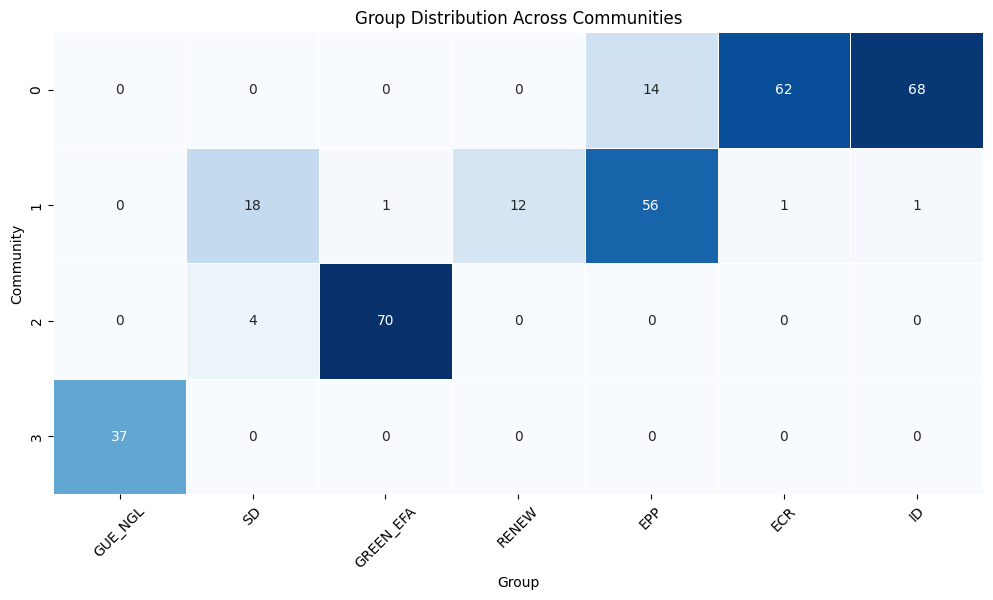

In [111]:
# Analyze and visualize the communities obtained for all bills whose primary subject is 7 (among any other possible primary subjects)
community_results_7 = analyze_communities(cleaned_edgelist_7)

plot_community_heatmap(community_results_7)

In [112]:
# Export the edges file as a CSV
cleaned_edgelist_7.to_csv("../matrices_and_networks/primary_subjects/7_area_of_freedom_security_and_justice/edges.csv", index=False)

In [113]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_7
unique_mep_ids = set(cleaned_edgelist_7['Source']).union(set(cleaned_edgelist_7['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/primary_subjects/7_area_of_freedom_security_and_justice/nodes.csv", index=False)

### 4.8. State and evolution of the Union
<a id="State-and-evolution-of-the-Union"></a>

In [114]:
# Filter for only bills whose primary subject is 8 - State and evolution of the Union (among any other possible primary subjects)
primary_subject_bills_8 = primary_subject_bills[primary_subject_bills["primary_subject"] == "State and evolution of the Union"]

In [115]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose primary subject is 8 (among any other possible primary subjects)
member_votes_8 = member_votes[member_votes['id_bill'].isin(primary_subject_bills_8['id_bill'])]

In [116]:
# Create the agents and artifacts for all bills whose primary subject is 8 (among any other possible primary subjects)
all_bills_primary_subject_8 = create_agents_and_artifacts(member_votes_8)

all_bills_primary_subject_8

,name,bill_5,bill_6,bill_7,bill_8,bill_9,bill_10,bill_16,bill_17,bill_18,...,bill_1857,bill_1864,bill_1866,bill_1867,bill_1892,bill_1893,bill_1894,bill_1896,bill_1897,bill_1903
0,Charles GOERENS (LUX-RENEW),1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,1,1,1,1,1,1,0,1,...,1,0,0,0,1,0,1,1,1,1
3,Markus FERBER (DEU-EPP),1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,0,1,1
4,Peter LIESE (DEU-EPP),1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [117]:
# Save the agents and artifacts for all bills whose primary subject is 8 (among any other possible primary subjects)
all_bills_primary_subject_8.to_csv("../matrices_and_networks/primary_subjects/8_state_and_evolution_of_the_union/agents_and_artifacts_8.csv", index=False)

In [118]:
# Load the edgelist for all bills whose primary subject is 8 (among any other possible primary subjects)
edgelist_8 = pd.read_csv("../matrices_and_networks/primary_subjects/8_state_and_evolution_of_the_union/edgelist_8.csv")

# Visualize the edgelist for all bills whose primary subject is 8 (among any other possible primary subjects)
edgelist_8

,from,to,weight
0,Constanze KREHL (DEU-SD),Antonio TAJANI (ITA-EPP),1
1,Constanze KREHL (DEU-SD),Frédérique RIES (BEL-RENEW),1
2,Constanze KREHL (DEU-SD),Raffaele FITTO (ITA-ECR),1
3,Constanze KREHL (DEU-SD),Lefteris CHRISTOFOROU (CYP-EPP),1
4,Constanze KREHL (DEU-SD),Markus PIEPER (DEU-EPP),1
...,...,...,...
10578,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
10579,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
10580,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
10581,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [119]:
# Create the cleaned edgelist of all bills whose primary subject is 8 (among any other possible primary subjects)
cleaned_edgelist_8 = create_clean_edgelist(edgelist_8)

cleaned_edgelist_8

,Source,Target
0,2,10
1,2,15
2,2,20
3,2,46
4,2,55
...,...,...
10578,813,816
10579,813,817
10580,815,816
10581,815,817


In [120]:
# Compute the optimal modularity for all bills whose primary subject is 8 (among any other possible primary subjects)
optimal_modularity_8 = compute_optimal_modularity(cleaned_edgelist_8)

optimal_modularity_8

0.5862066747226866

In [121]:
# Compute the partisan modularity for all bills whose primary subject is 8 (among any other possible primary subjects)
partisan_modularity_8 = compute_partisan_modularity(cleaned_edgelist_8)

partisan_modularity_8

0.3498104270442625

The network is **disconnected** with 9 components.
Removed 8 small components (<20 nodes).


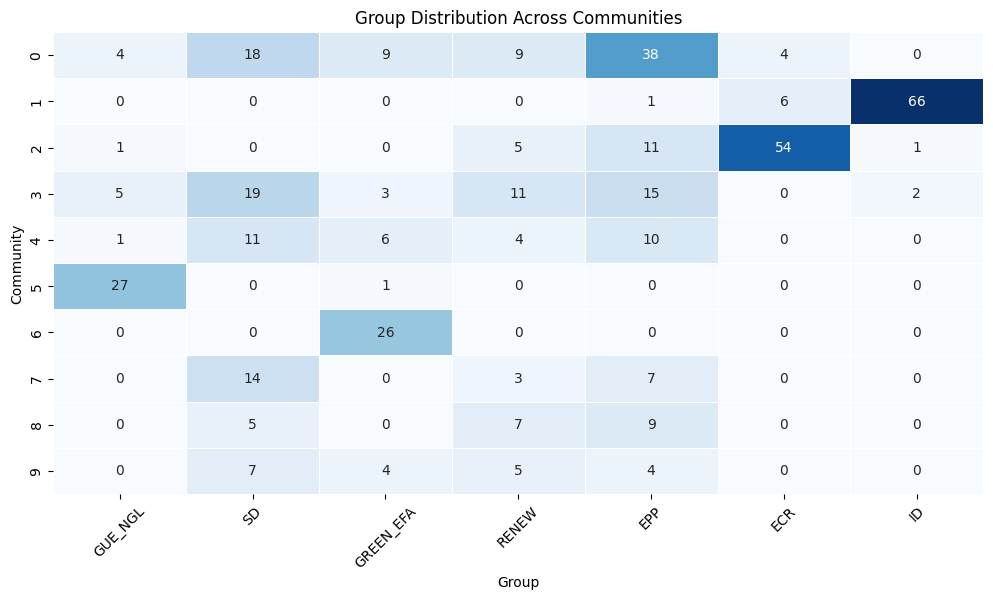

In [122]:
# Analyze and visualize the communities obtained for all bills whose primary subject is 8 (among any other possible primary subjects)
community_results_8 = analyze_communities(cleaned_edgelist_8)

plot_community_heatmap(community_results_8)

In [123]:
# Export the edges file as a CSV
cleaned_edgelist_8.to_csv("../matrices_and_networks/primary_subjects/8_state_and_evolution_of_the_union/edges.csv", index=False)

In [124]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_8
unique_mep_ids = set(cleaned_edgelist_8['Source']).union(set(cleaned_edgelist_8['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/primary_subjects/8_state_and_evolution_of_the_union/nodes.csv", index=False)

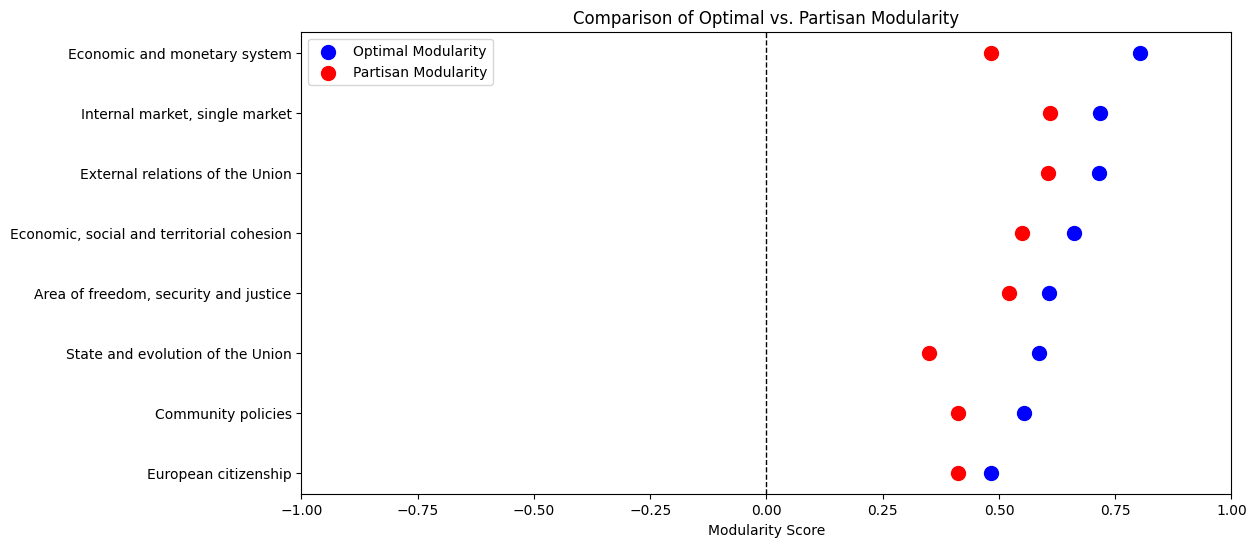

In [125]:
# Define the list of optimal modularities across all subjects
list_optimal_modularities = [optimal_modularity_1, optimal_modularity_2, optimal_modularity_3, optimal_modularity_4, 
                             optimal_modularity_5, optimal_modularity_6, optimal_modularity_7, optimal_modularity_8]

# Define the list of partisan modularities across all subjects
list_partisan_modularities = [partisan_modularity_1, partisan_modularity_2, partisan_modularity_3, partisan_modularity_4, 
                              partisan_modularity_5, partisan_modularity_6, partisan_modularity_7, partisan_modularity_8]

# Define the list of primary subjects
primary_subjects = ["European citizenship", "Internal market, single market", "Community policies", 
                    "Economic, social and territorial cohesion", "Economic and monetary system",
                    "External relations of the Union", "Area of freedom, security and justice", 
                    "State and evolution of the Union"]

# Create a DataFrame to store modularity values along with their corresponding subjects
df = pd.DataFrame({
    "Subject": primary_subjects,
    "Optimal Modularity": list_optimal_modularities,
    "Partisan Modularity": list_partisan_modularities
})

# Sort subjects based on optimal modularity values (ascending order)
df = df.sort_values("Optimal Modularity", ascending=True)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Optimal Modularity (blue dots)
ax.scatter(df["Optimal Modularity"], df["Subject"], color="blue", label="Optimal Modularity", s=100)

# Plot Partisan Modularity (red dots)
ax.scatter(df["Partisan Modularity"], df["Subject"], color="red", label="Partisan Modularity", s=100)

# Add vertical reference line at x = 0
ax.axvline(x=0, color='black', linewidth=1, linestyle="--")

# Set x-axis limits to range from -1 to 1
ax.set_xlim(-1, 1)

# Labels and title
ax.set_xlabel("Modularity Score")
ax.set_title("Comparison of Optimal vs. Partisan Modularity")
ax.legend()

# Show the plot
plt.show()